In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
# 1. Read in the coupons.csv file
df = pd.read_csv('data/coupons.csv')

In [6]:
df.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


expiration
1d    7091
2h    5593
Name: count, dtype: int64


gender
Female    6511
Male      6173
Name: count, dtype: int64


age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


maritalStatus
Married partner      5100
Single         

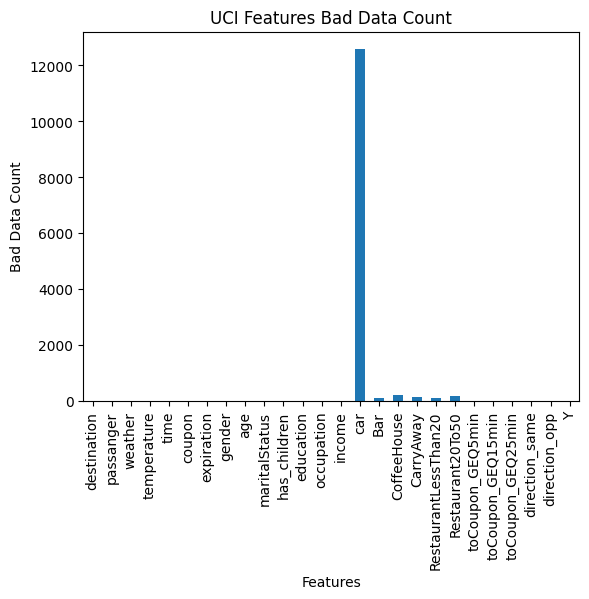




Feature 'car' have too many error entries, remove column from calculations





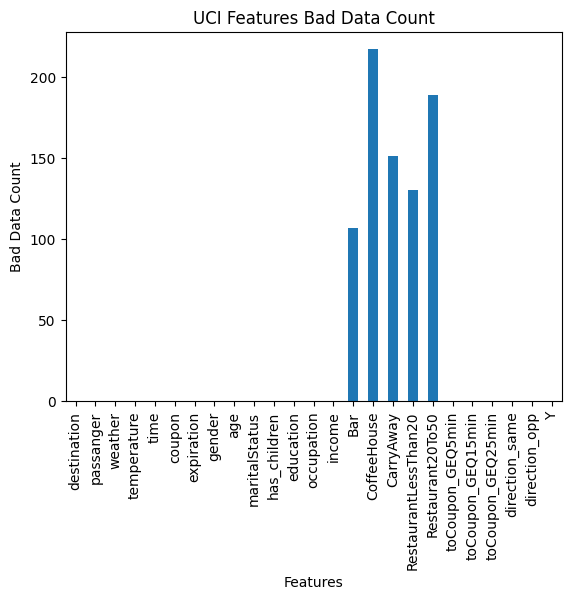

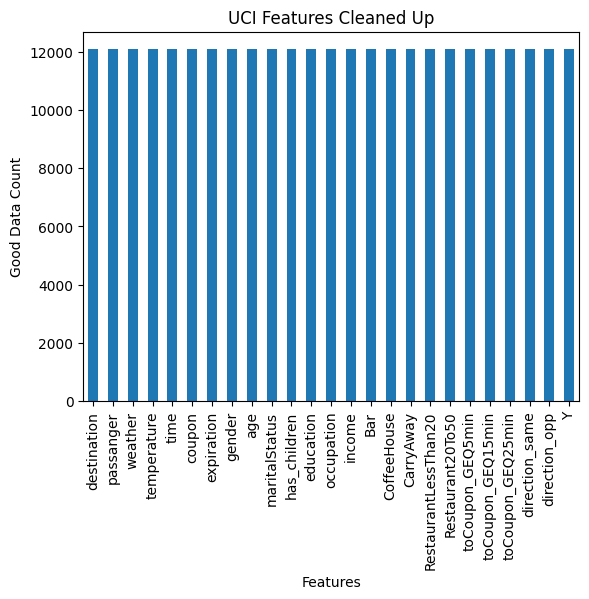

In [7]:
# 2. Investigate the dataset for missing or problematic data.
for index in df.columns:
    print(df[index].value_counts())
    print("\n")
bad_data = df.isna().sum()
bad_data.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Bad Data Count')
plt.title('UCI Features Bad Data Count')
plt.show()

print("\n\n")
print("Feature 'car' have too many error entries, remove column from calculations")
print("\n\n")

df = df.drop( columns=['car'] )

bad_data = df.isna().sum()
bad_data.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Bad Data Count')
plt.title('UCI Features Bad Data Count')
plt.show()

df_data = df.dropna().copy()
df_p = df_data.count()

df_p.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Good Data Count')
plt.title('UCI Features Cleaned Up')
plt.show()


In [8]:
# 3. Decide what to do about your missing data -- drop, replace, other...
print("\n\nQuestion #3: Missing Data Decision:  Drop 'car' column, and drop NA\n\n")



Question #3: Missing Data Decision:  Drop 'car' column, and drop NA




In [9]:
# 4. What proportion of the total observations chose to accept the coupon?
total_accept = df_data.groupby('Y')['Y'].count()

acceptance_rate = total_accept[1] / df_data.shape[0] * 100
print(f'\nCoupon Acceptance Rate: {acceptance_rate:.2f}% \n')


Coupon Acceptance Rate: 56.93% 



Text(0.5, 1.0, 'Coupon Issued')

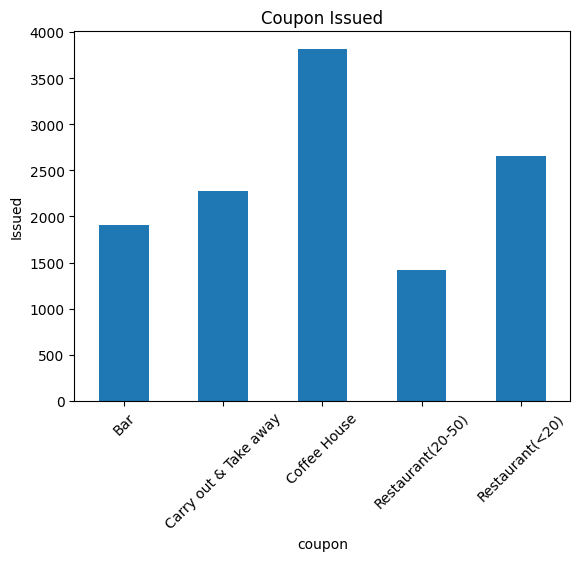

In [10]:
# 5. Use a bar plot to visualize the coupon column.
coupon_bar = df_data.groupby('coupon')['coupon'].count()
coupon_bar.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Issued')
plt.title( 'Coupon Issued')

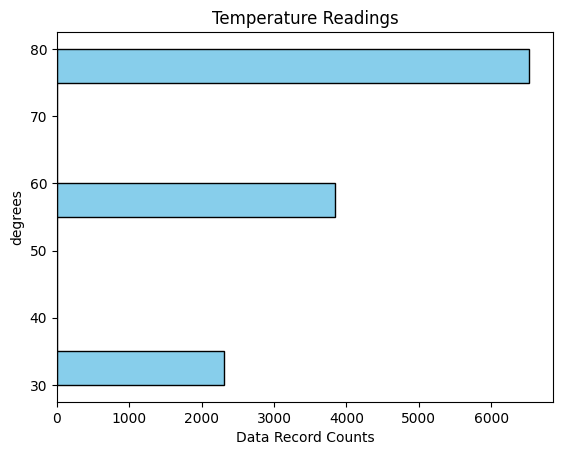

In [11]:
# 6. Use a histogram to visualize the temperature column.
plt.hist(df['temperature'], bins=10, color='skyblue', edgecolor='black', orientation='horizontal')
plt.xlabel('Data Record Counts')
plt.ylabel('degrees')
plt.title( 'Temperature Readings')
plt.show()

In [12]:
# Investigating the Bar Coupons
# 1. Create a new DataFrame that contains just the bar coupons.
df_bar = df_data[['Bar']]
print(f'\nBar dataFrame Type: {type(df_bar)}\n')



Bar dataFrame Type: <class 'pandas.core.frame.DataFrame'>



In [13]:
# 2. What proportion of bar coupons were accepted?
df_bar_acc = df_data[['Bar','Y']]
df_bar_never = df_bar_acc[ df_bar_acc['Y'] == 0 ]

df_bar_acceptance = (df_bar_acc.count() - df_bar_never.count() ) / df_bar_acc.count() * 100

print(f'coupon acceptance rate: {df_bar_acceptance.iloc[0]:.2f}%')

coupon acceptance rate: 56.93%


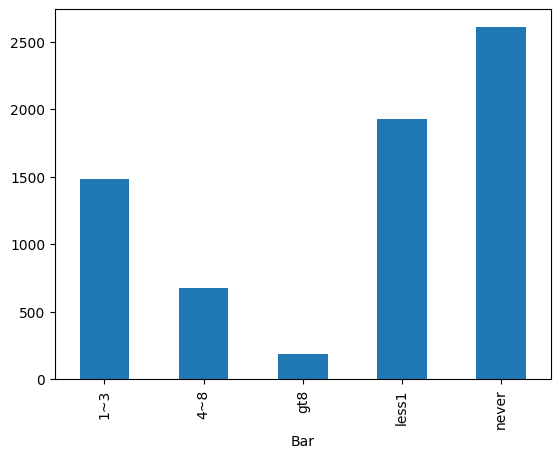

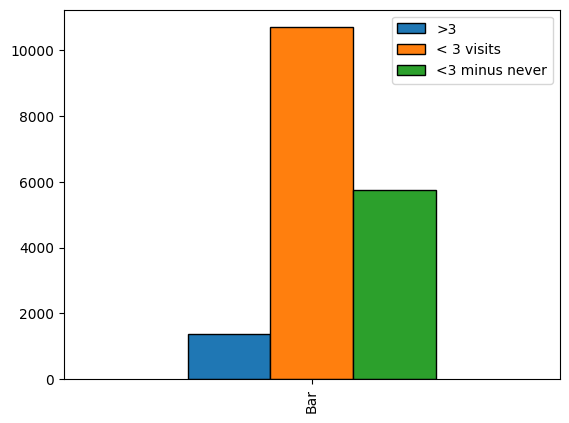

          Bar Coupon Visit Result Rates
> 3 visits     :  Bar    11.433066
dtype: float64
<=3 visits     :  Bar    88.566934
dtype: float64
<=3 minus never:  Bar    47.719182
dtype: float64


In [14]:
# 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more
df_bar_times = df_bar_acc.query('Y == 1').groupby('Bar')['Bar'].count()

df_bar_times.plot(kind='bar')
plt.show()

df_bar_gt_3  = df_bar[ (df_bar['Bar'] == 'gt8') | (df_bar['Bar'] == '4~8') ].count()
df_bar_lt_3  = df_bar[ (df_bar['Bar'] != 'gt8') & (df_bar['Bar'] != '4~8') ].count()
df_bar_lt_3_ = df_bar[ (df_bar['Bar'] != 'gt8') & (df_bar['Bar'] != '4~8') & (df_bar['Bar'] != 'never') ].count()
df_bar_total = df_bar['Bar'].count()

bar_acceptance_rate = pd.DataFrame({ '>3' : df_bar_gt_3, '< 3 visits' : df_bar_lt_3, '<3 minus never' : df_bar_lt_3_ })
bar_acceptance_rate.plot( kind='bar', edgecolor='black')
plt.show()

print(f'          Bar Coupon Visit Result Rates')
print(f'=====================================================')
print(f'> 3 visits     :  { 100* (df_bar_gt_3/(df_bar_total)) }')
print(f'<=3 visits     :  { 100* (df_bar_lt_3/(df_bar_total)) }')
print(f'<=3 minus never:  { 100* (df_bar_lt_3_/(df_bar_total))}')


([<matplotlib.patches.Wedge at 0x7f80ac15f940>,
 [Text(0.21531829938815933, 1.0787205522972996, '>25'),
  Text(-0.9183838560863126, -0.6054511482192724, '>25 never'),
  Text(0.5015933973575573, -0.9789811355318875, '<25'),
  Text(1.0487739540589611, -0.3317728037189493, '<25 never')])

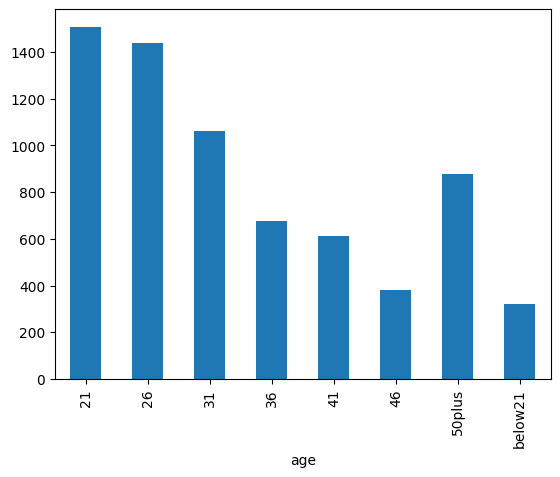

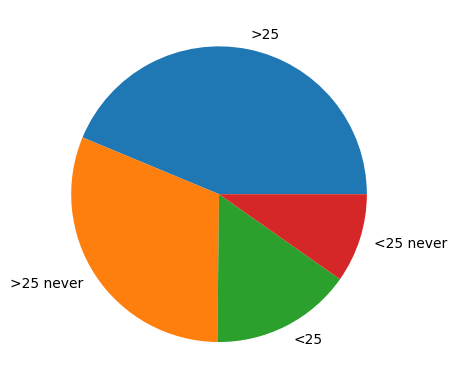

In [15]:
# 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?
df_age = df_data.query('Y == 1').groupby('age')['age'].value_counts()
# print(df_age.head())
df_age.plot(kind='bar')

df_data_age = df_data.copy()
df_data_age['age'] = df_data_age['age'].replace('50plus' ,'50')
df_data_age['age'] = df_data_age['age'].replace('below21','20')
df_data_age['age'] = df_data_age['age'].astype('int64')

# print(df_data_age.info())
count_age25_over   = df_data_age[ (df_data_age['age'] >= 25) &(df_data_age['Bar'] != 'never') ].count()['age']
count_age25_over_  = df_data_age[ (df_data_age['age'] >= 25) &(df_data_age['Bar'] == 'never') ].count()['age']
count_age25_under  = df_data_age[ (df_data_age['age'] <  25) &(df_data_age['Bar'] != 'never') ].count()['age']
count_age25_under_ = df_data_age[ (df_data_age['age'] <  25) &(df_data_age['Bar'] == 'never') ].count()['age']
count_all         = df_data_age[ (df_data_age['Bar'] != 'never') ].count()['age']

# print(f'>25: {count_age25_over}' )
# print(f'<25: {count_age25_under}')
# print(f'All: {count_all}')
      
values = [ count_age25_over, count_age25_over_, count_age25_under, count_age25_under_ ]
labels = [ '>25', '>25 never', '<25','<25 never' ]
fig,ax = plt.subplots()
ax.pie( values, labels=labels )

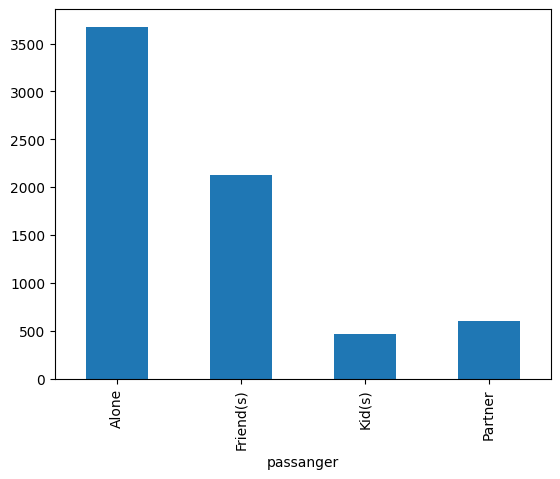

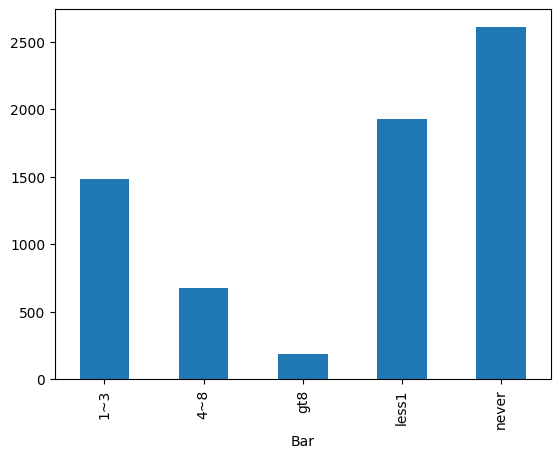

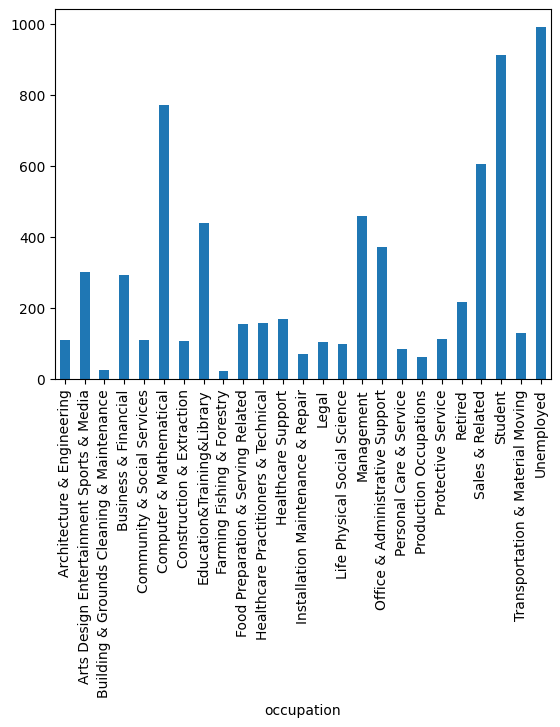

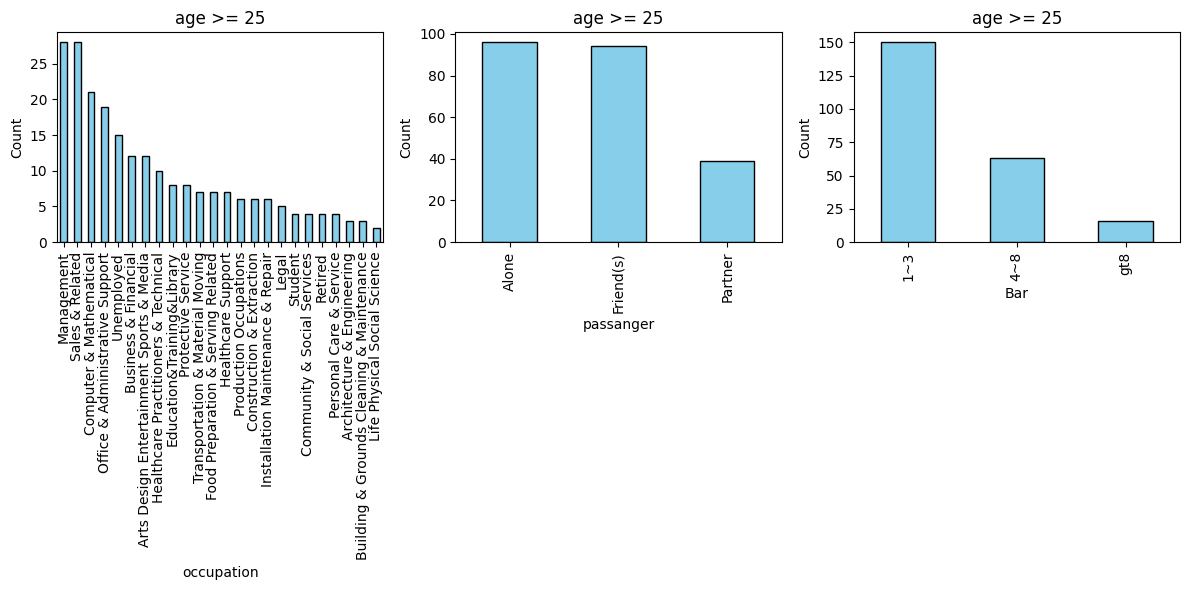

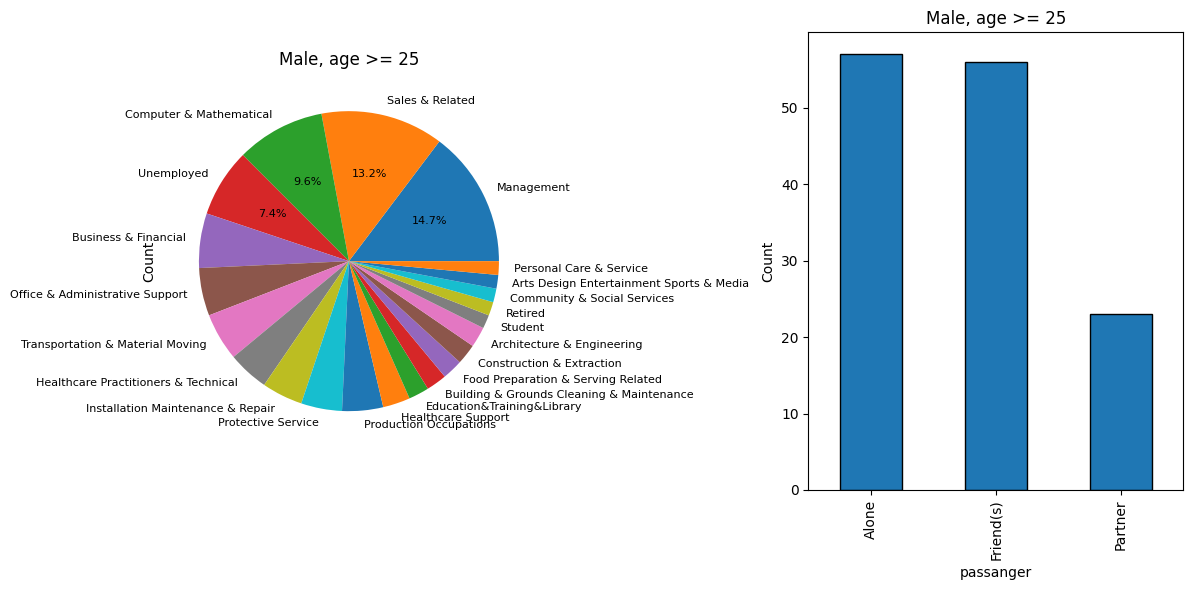

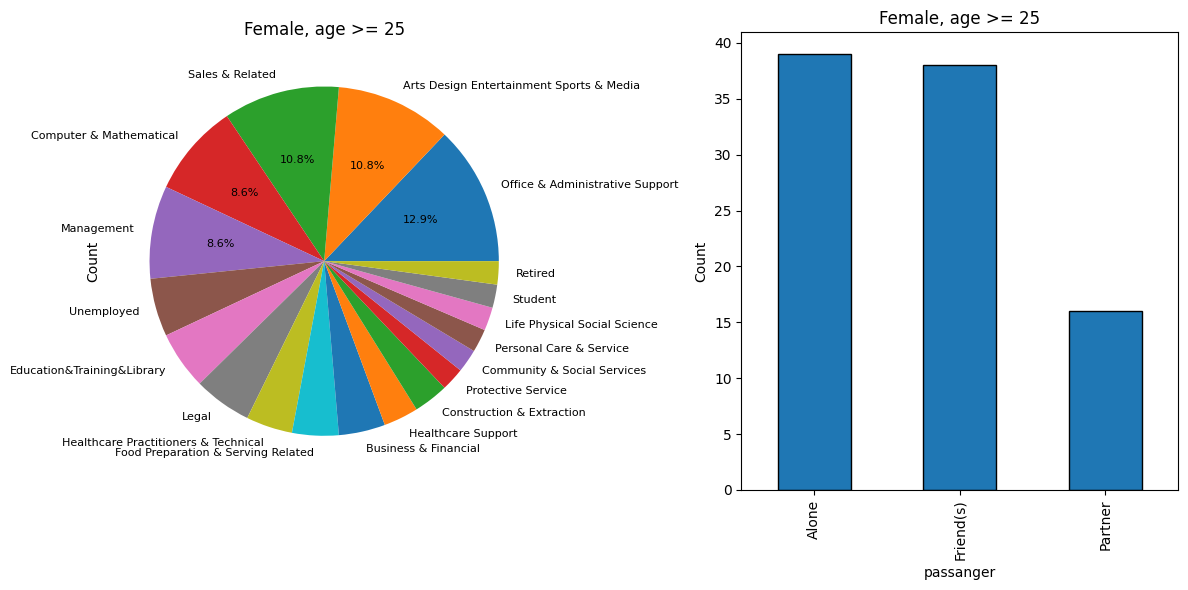

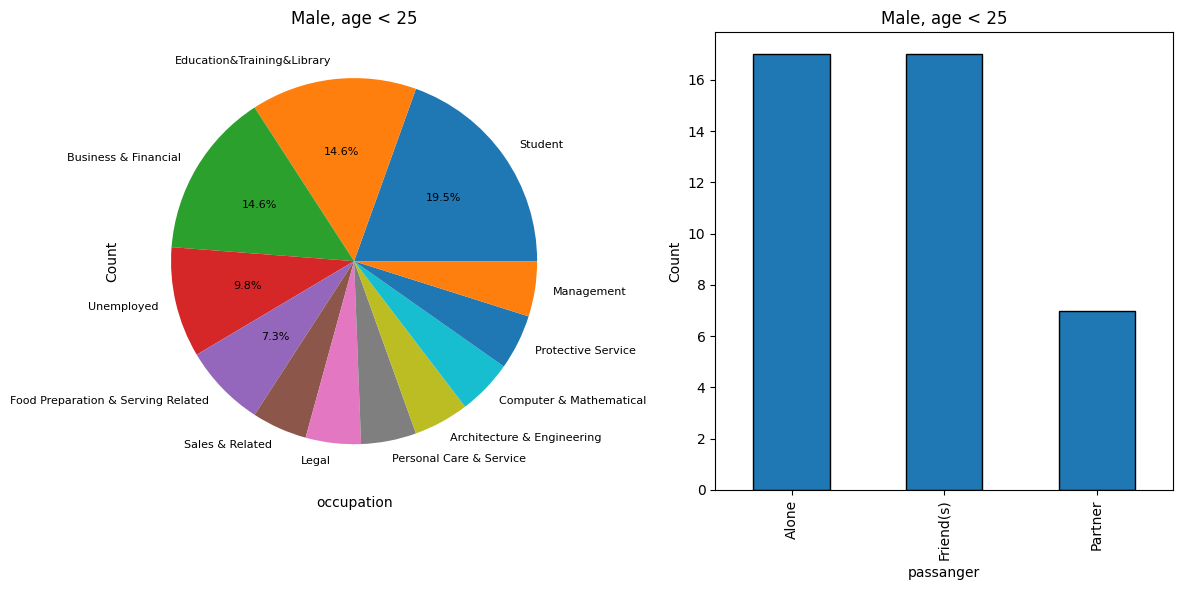

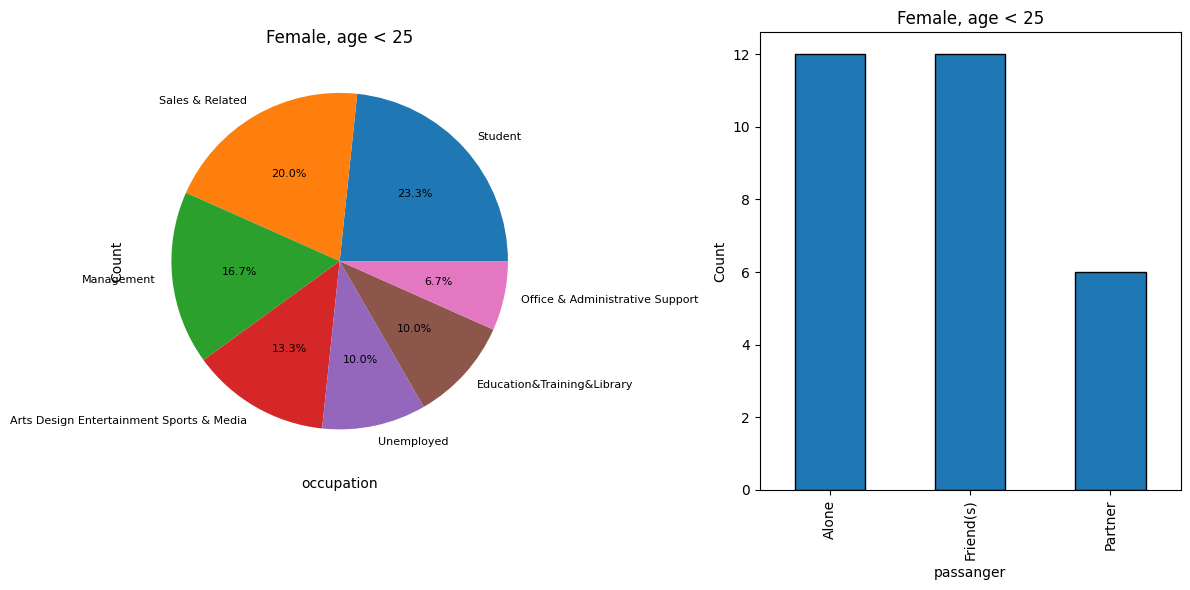

In [16]:
# 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and 
# had occupations other than farming, fishing, or forestry.
occupation_list = ['farming', 'fishing', 'forestry']
passenger_criteria = ['Kid(s)']
bar_visits = ['never','less1']

df_data_age = df_data.copy()
df_data_age['age'] = df_data_age['age'].replace('50plus' ,'50')
df_data_age['age'] = df_data_age['age'].replace('below21','20')
df_data_age['age'] = df_data_age['age'].astype('int64')

df_passenger = df_data_age.query('Y == 1').groupby('passanger')['passanger'].value_counts()
df_passenger.plot(kind='bar')
plt.show()

df_b = df_data_age.query('Y == 1').groupby('Bar')['Bar'].value_counts()
df_b.plot(kind='bar')
plt.show()

df_occupation = df_data_age.query('Y == 1').groupby('occupation')['occupation'].value_counts()
df_occupation.plot(kind='bar')
plt.show()

agg_list = ['age','gender','occupation','passanger','Bar']
df_a = df_data_age.query('Y == 1').query('occupation not in @occupation_list').query('passanger not in @passenger_criteria').query('Bar not in @bar_visits')
df_a = df_a.groupby('age')[ agg_list ].value_counts().reset_index()
df_a_over = df_a[ df_a['age'] >= 25 ]
df_a_under= df_a[ df_a['age'] <  25 ]

# Plot bar plots for Occupation, Passenger, and Bar
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
for i, col in enumerate(['occupation', 'passanger', 'Bar']):
    df_a_over[col].value_counts().plot(kind='bar', ax=axs[i], color='skyblue', edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'age >= 25')    
plt.tight_layout()
plt.show()

# Plot bar plots for Occupation, Passenger, and Bar
for gender in ['Male','Female']:
    df_g = df_a[ df_a['gender'] == gender ]
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    for i, col in enumerate(['occupation', 'passanger']):
        df_over  = df_g[ df_g['age'] >= 25 ]
        if i == 1:
            df_over[col].value_counts().plot(kind='bar', ax=axs[i], edgecolor='black')
        else:
            df_over[col].value_counts().plot(kind='pie', ax=axs[i], autopct=lambda p: f'{p:.1f}%' if p>6.0 else '', fontsize=8 )
        axs[i].set_ylabel('Count')
        axs[i].set_title(f'{gender}, age >= 25')
    plt.tight_layout()
    plt.show()
    
for gender in ['Male','Female']:
    df_g = df_a[ df_a['gender'] == gender ]
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    for i, col in enumerate(['occupation', 'passanger']):
        df_under = df_g[ df_g['age'] < 25  ]
        if i == 1:
            df_under[col].value_counts().plot(kind='bar', ax=axs[i], edgecolor='black')
        else:
            df_under[col].value_counts().plot(kind='pie', ax=axs[i], autopct=lambda p: f'{p:.1f}%' if p>6.0 else '', fontsize=8 )
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')
        axs[i].set_title(f'{gender}, age < 25')
    plt.tight_layout()
    plt.show()
    

In [17]:
# 6. Compare the acceptance rates between those drivers who:
#    go to bars more than once a month, had passengers that were not a kid, and were not widowed OR


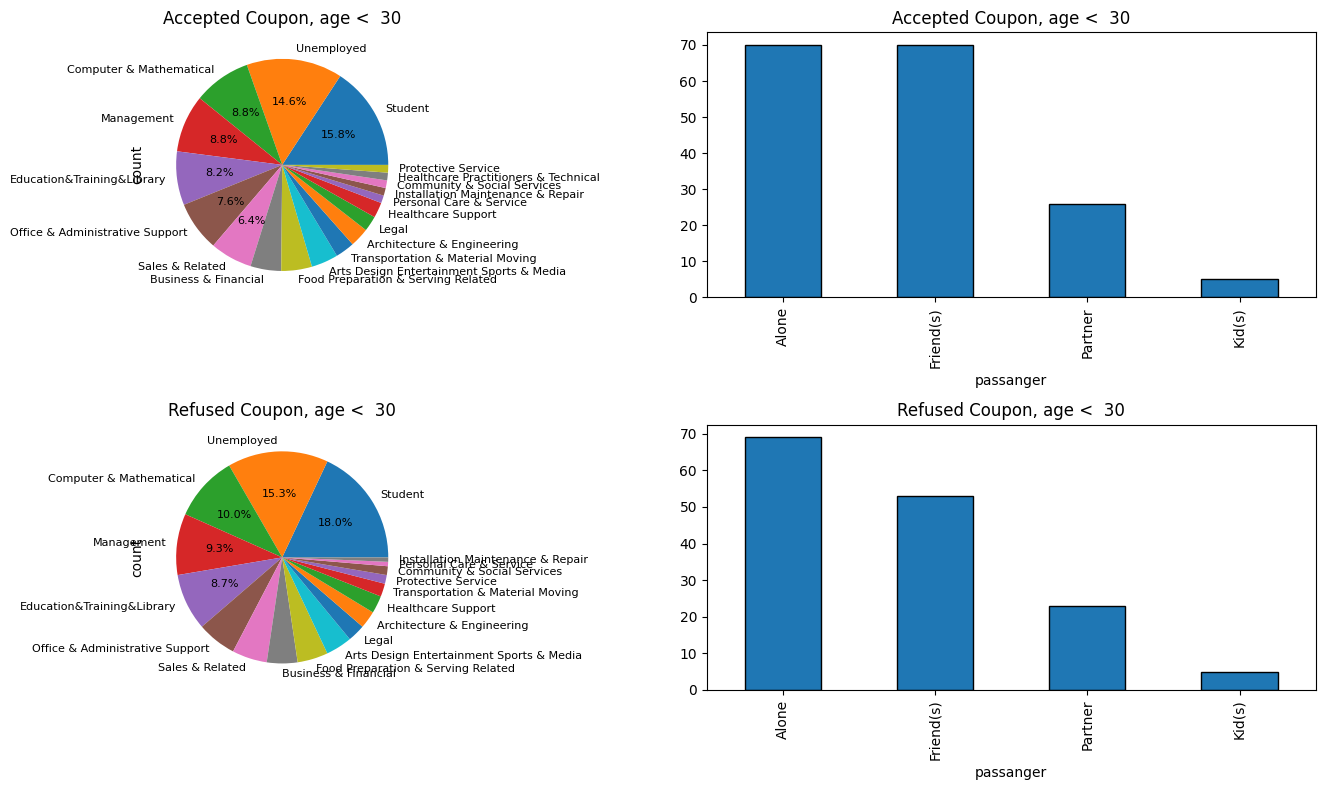

In [18]:
#    go to bars more than once a month and are under the age of 30 OR

occupation_list = []
passenger_criteria = []
marital_status = []

bar_visits = ['never','less1']

df_data_age = df_data.copy()
df_data_age['age'] = df_data_age['age'].replace('50plus' ,'50')
df_data_age['age'] = df_data_age['age'].replace('below21','20')
df_data_age['age'] = df_data_age['age'].astype('int64')

agg_list = ['age','gender','occupation','passanger','Bar','maritalStatus']
df_a1 = df_data_age.query('Bar not in @bar_visits')
df_a = df_a1[ df_a1['Y'] == 1 ]
df_n = df_a1[ df_a1['Y'] == 0 ]

df_a = df_a.groupby('age')[ agg_list ].value_counts().reset_index()
df_a_under= df_a[ df_a['age'] <  30 ]

df_n = df_n.groupby('age')[ agg_list ].value_counts().reset_index()
df_n_under= df_n[ df_n['age'] <  30 ]

# Plot bar plots for Occupation, Passenger, and Bar who accepted coupon offering
#
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
for j, df_ in enumerate( [df_a_under, df_n_under] ):
    for i, col in enumerate(['occupation', 'passanger']):
        if i == 1:
            df_[col].value_counts().plot(kind='bar', ax=axs[j,i], edgecolor='black')
        else:
            df_[col].value_counts().plot(kind='pie', ax=axs[j,i], autopct=lambda p: f'{p:.1f}%' if p>6.0 else '', fontsize=8 )
        if df_.equals(df_a_under):
            axs[j,i].set_title(f'Accepted Coupon, age <  30')
        else:
            axs[j,i].set_title(f'Refused Coupon, age <  30')
plt.tight_layout()
plt.show()



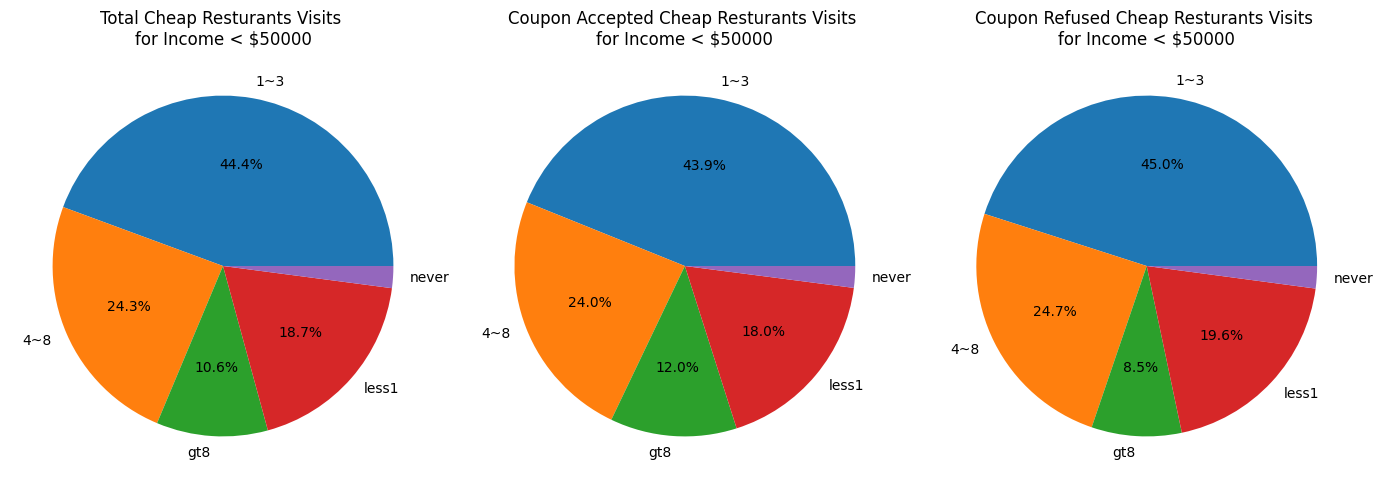

In [19]:

#    go to cheap restaurants more than 4 times a month and income is less than 50K.
df_data_age = df_data.copy()
df_data_age['age'] = df_data_age['age'].replace('50plus' ,'50')
df_data_age['age'] = df_data_age['age'].replace('below21','20')
df_data_age['age'] = df_data_age['age'].astype('int64')

rating_dim = ['gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway']

group_criteria = ['RestaurantLessThan20']
income_criteria = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

df_q = df_data_age.query('income in @income_criteria').groupby(group_criteria)[rating_dim].count()

df_qa = df_data_age.query('income in @income_criteria').query('Y == 1').groupby(group_criteria)[rating_dim].count()

df_na = df_data_age.query('income in @income_criteria').query('Y == 0').groupby(group_criteria)[rating_dim].count()

fig, axs = plt.subplots(1, 3, figsize=(14, 8))
axs[0].pie(x=df_q['income'],autopct=lambda p: f'{p:.1f}%' if p>6.0 else '',labels=df_q.index, labeldistance=1.1 )
axs[0].set_title('Total Cheap Resturants Visits \nfor Income < $50000')
axs[1].pie(x=df_qa['income'],autopct=lambda p: f'{p:.1f}%' if p>6.0 else '',labels=df_qa.index, labeldistance=1.1 )
axs[1].set_title('Coupon Accepted Cheap Resturants Visits \nfor Income < $50000')
axs[2].pie(x=df_na['income'],autopct=lambda p: f'{p:.1f}%' if p>6.0 else '',labels=df_na.index, labeldistance=1.1 )
axs[2].set_title('Coupon Refused Cheap Resturants Visits \nfor Income < $50000')

plt.tight_layout()
plt.show()

#df_na_resetindex = df_na.reset_index()
#
#print(df_na_resetindex.info())
#print(df_na_resetindex['occupation'].head())

In [20]:
# 7. Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

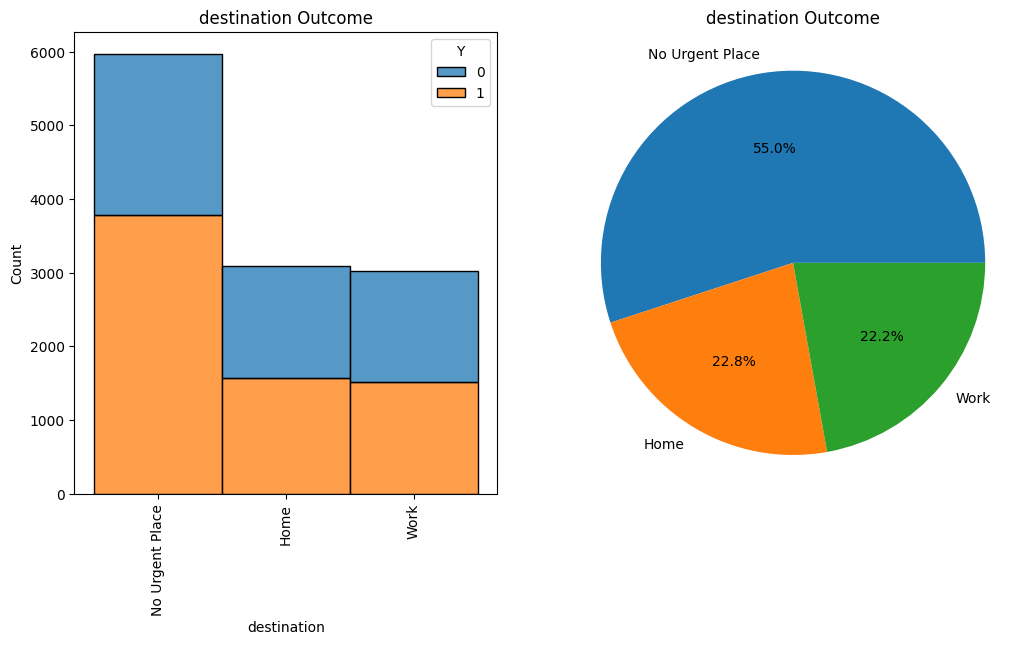

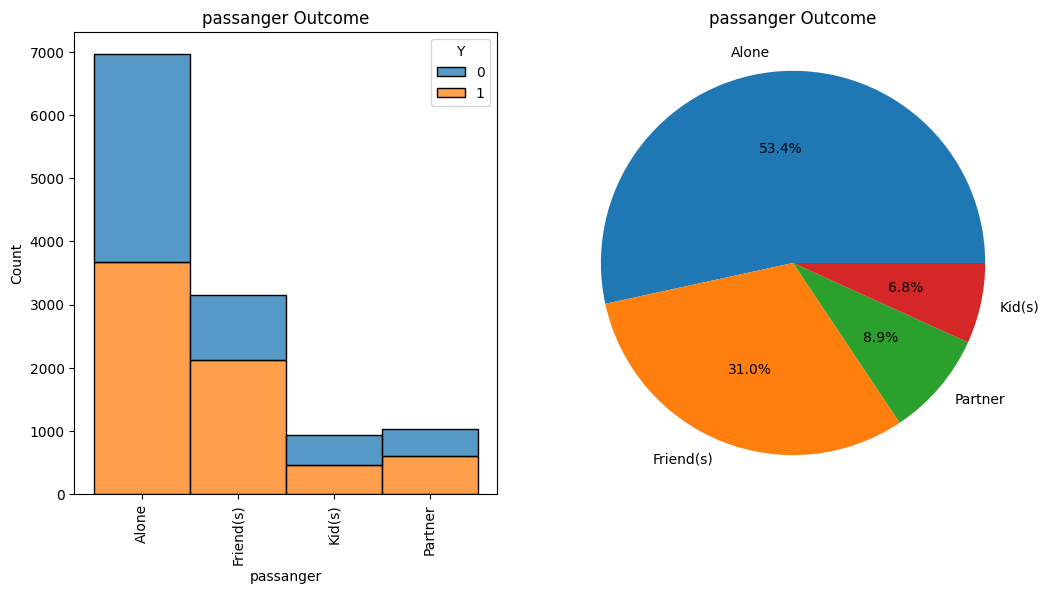

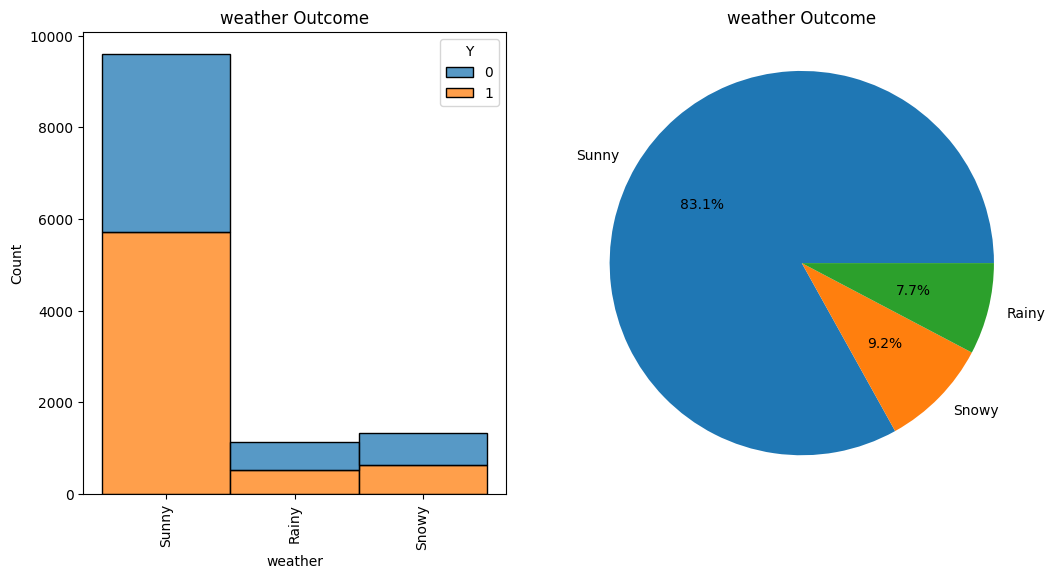

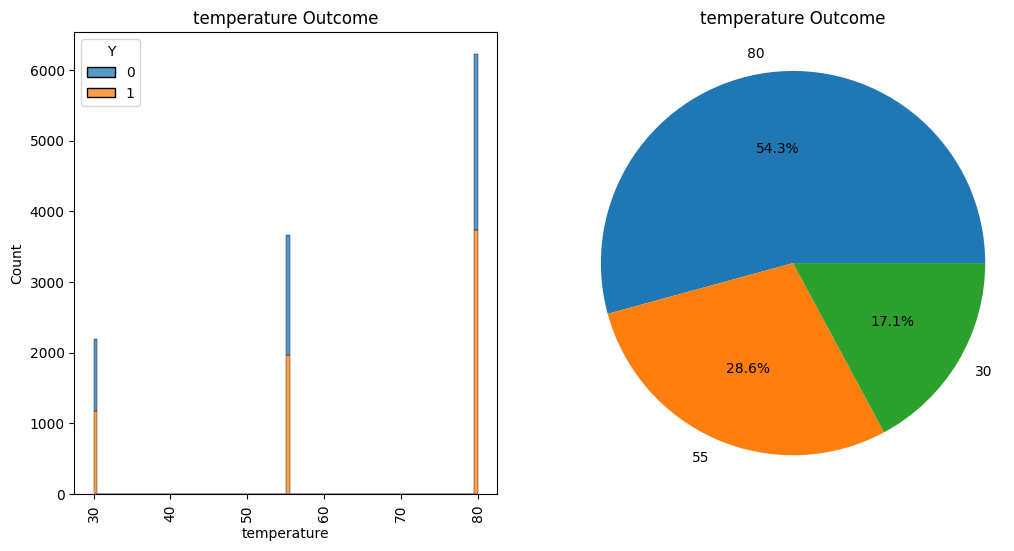

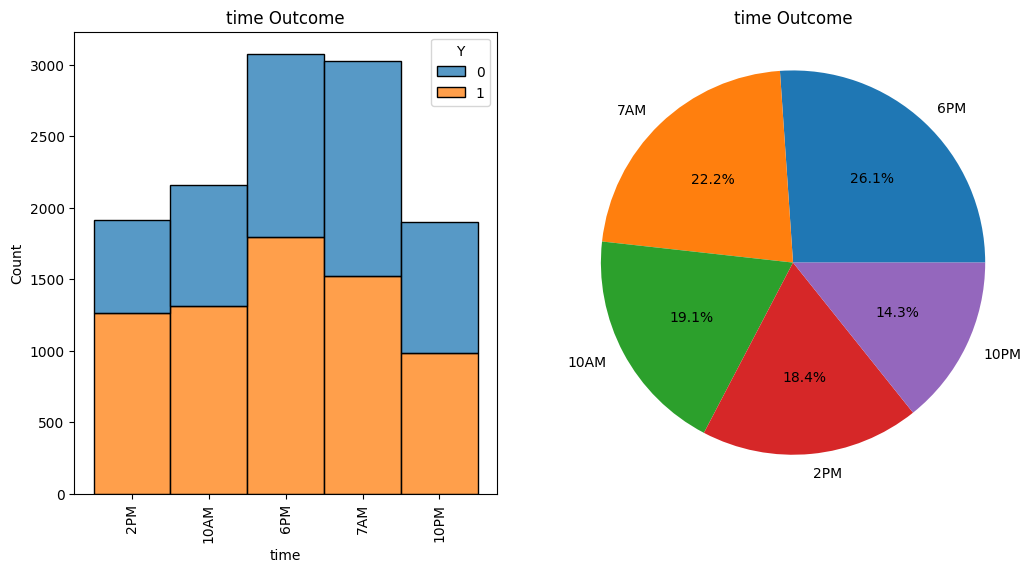

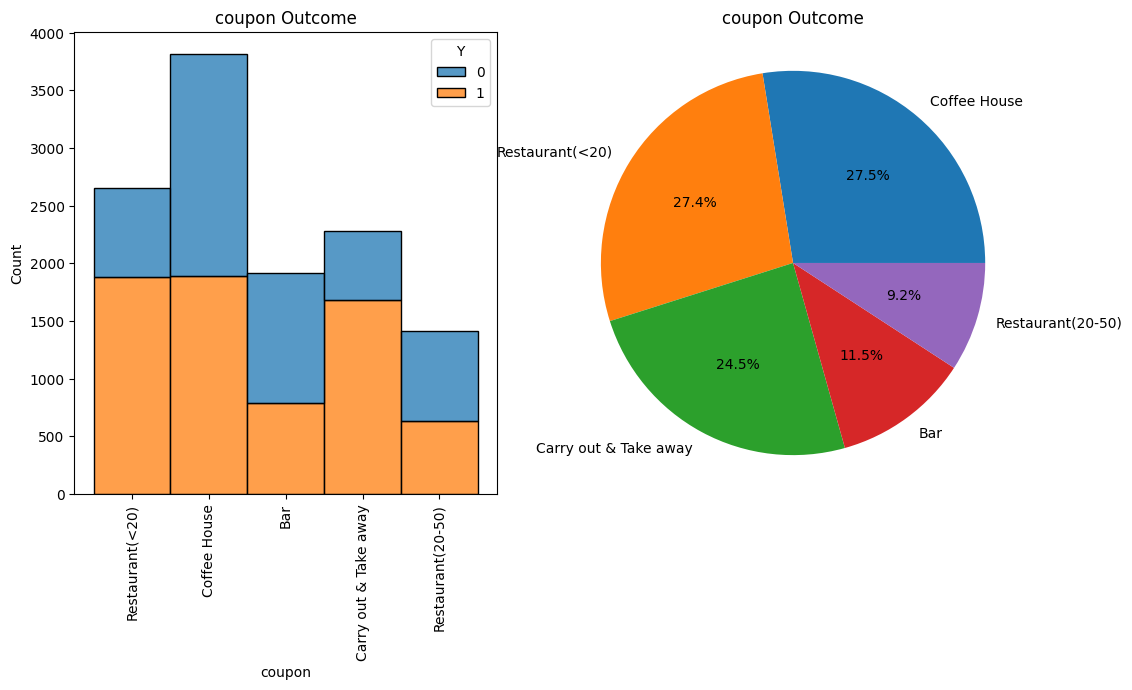

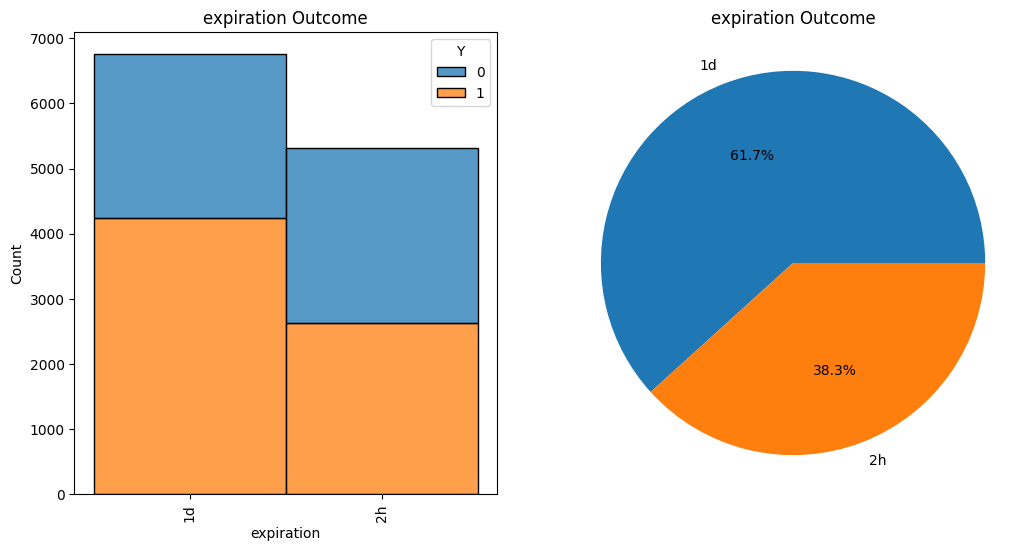

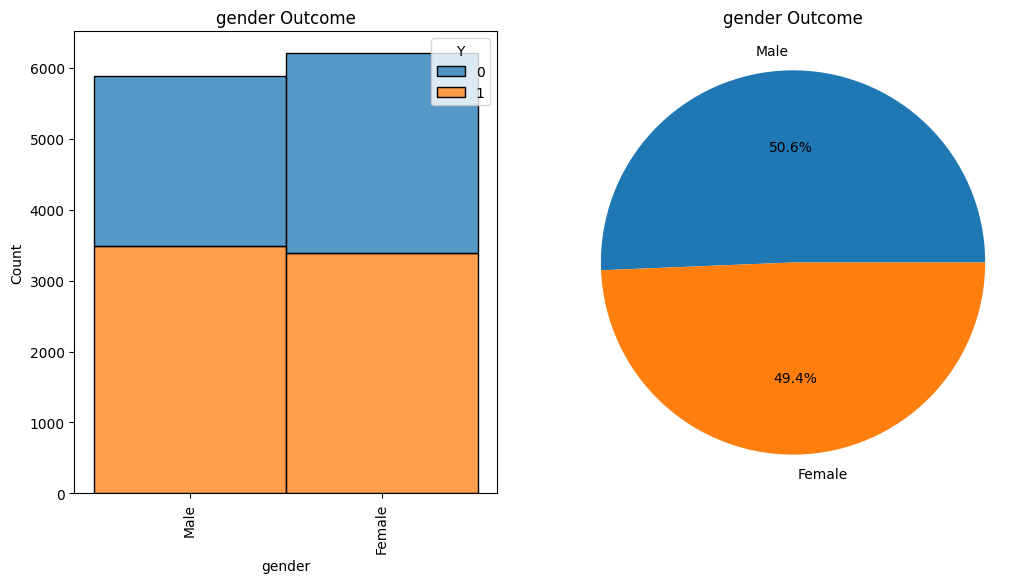

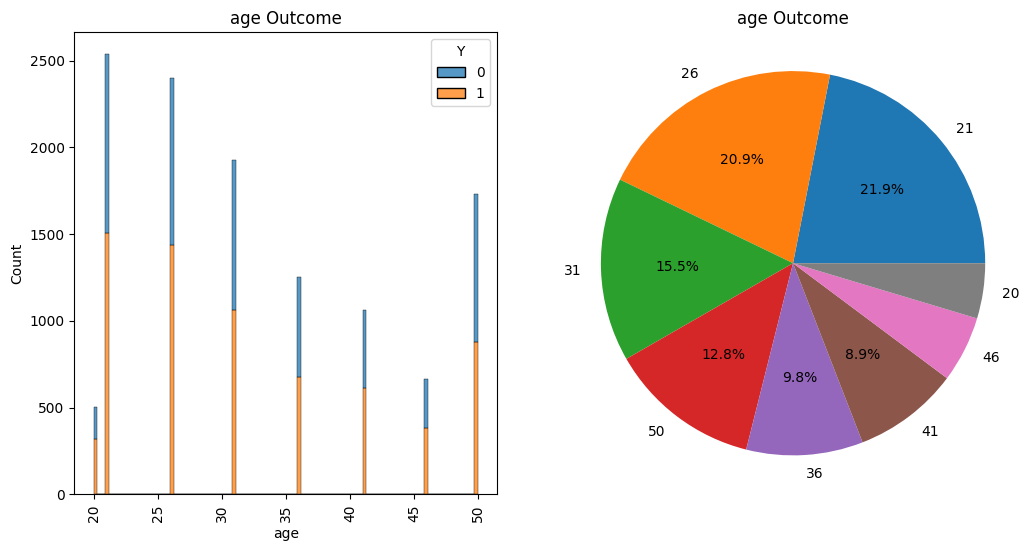

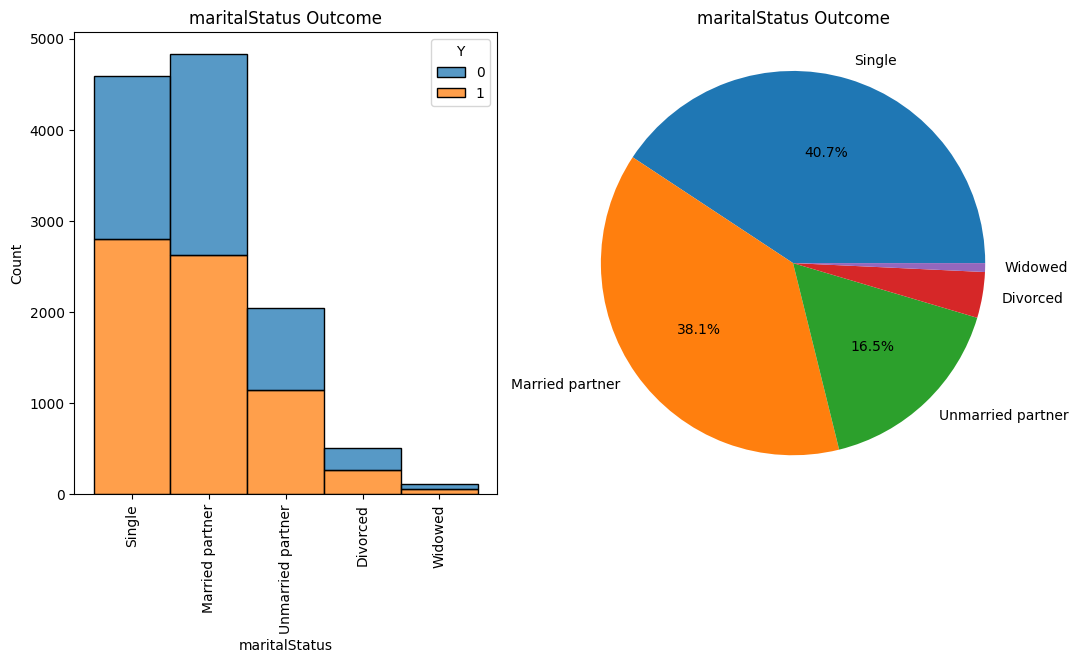

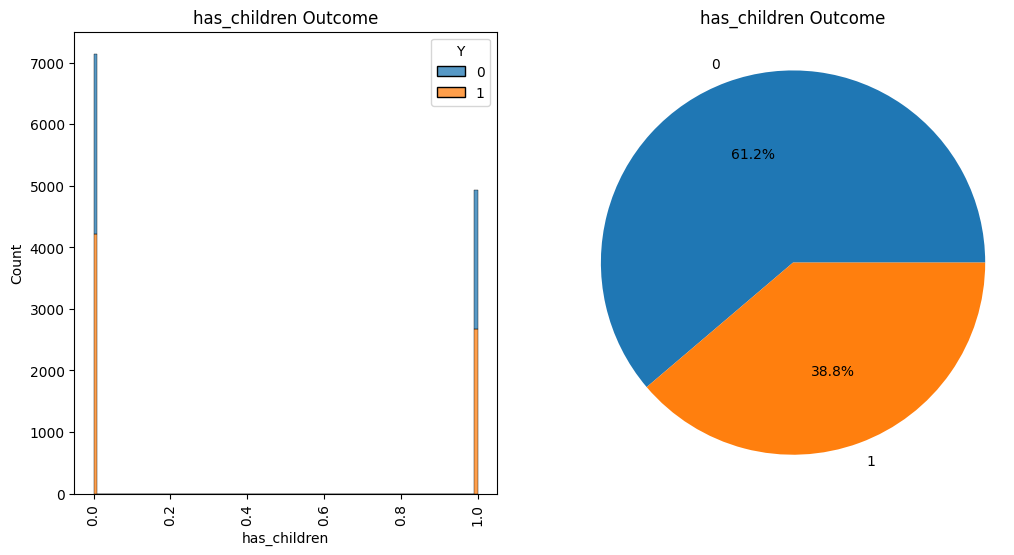

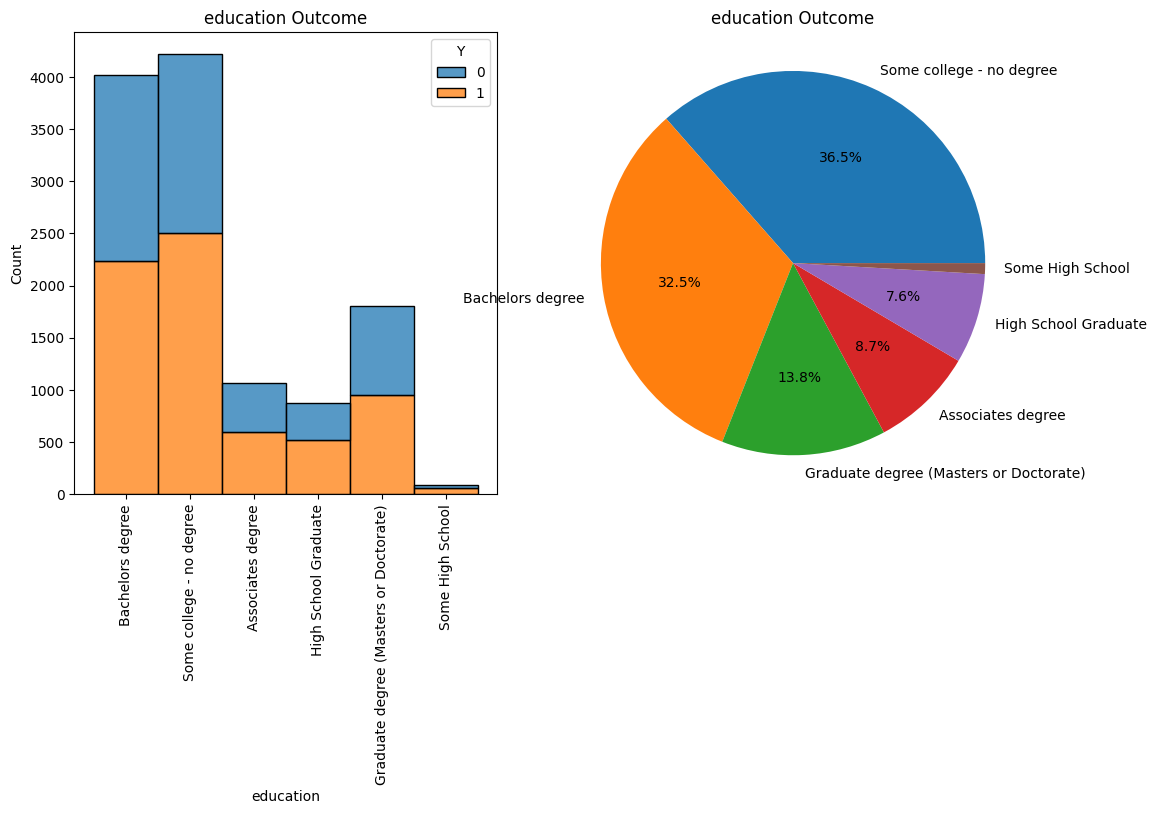

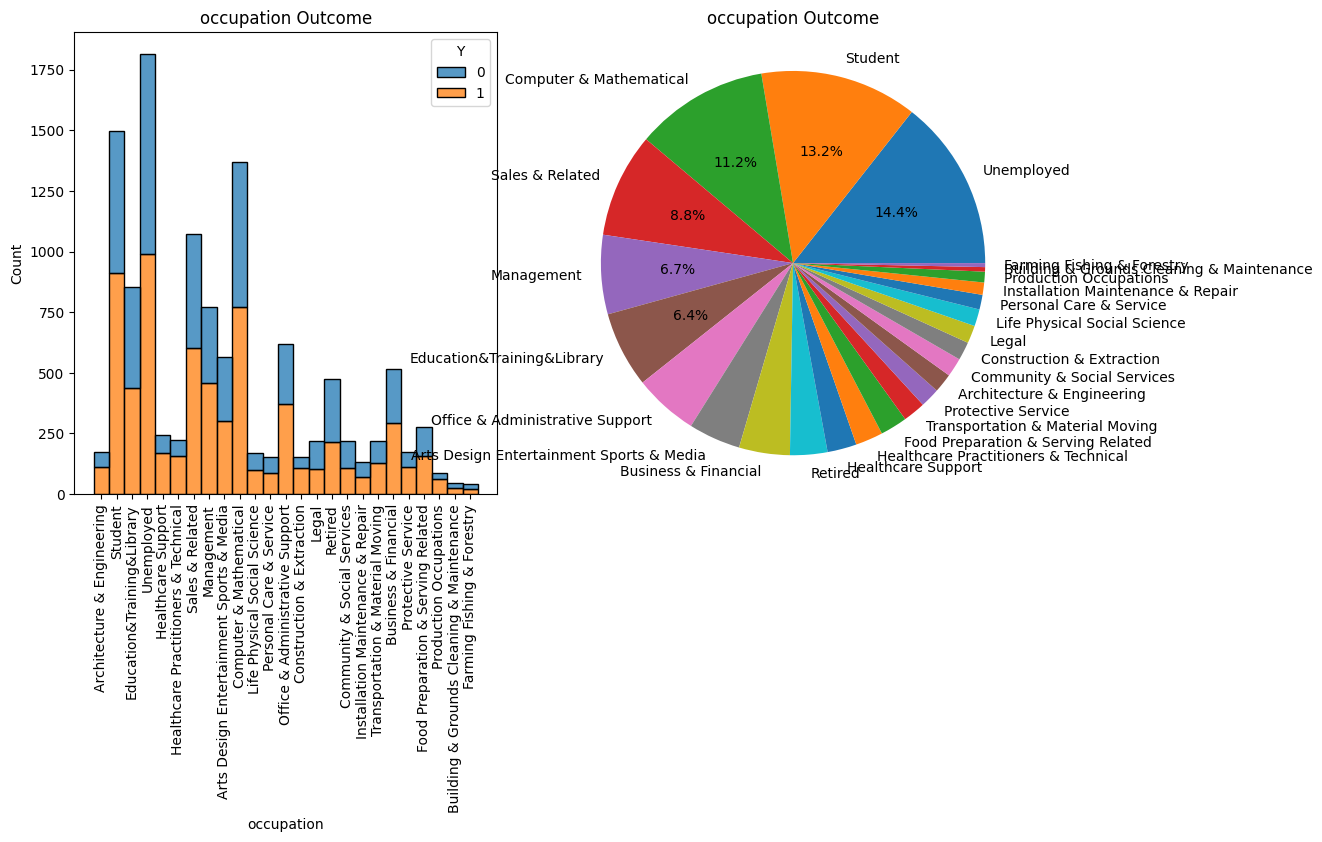

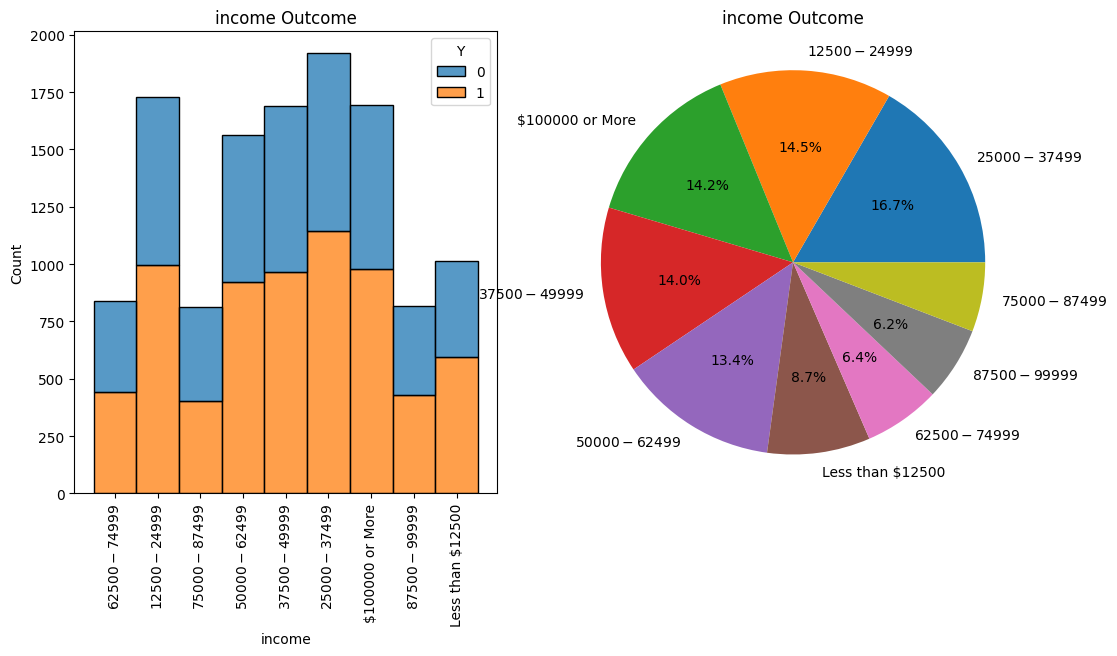

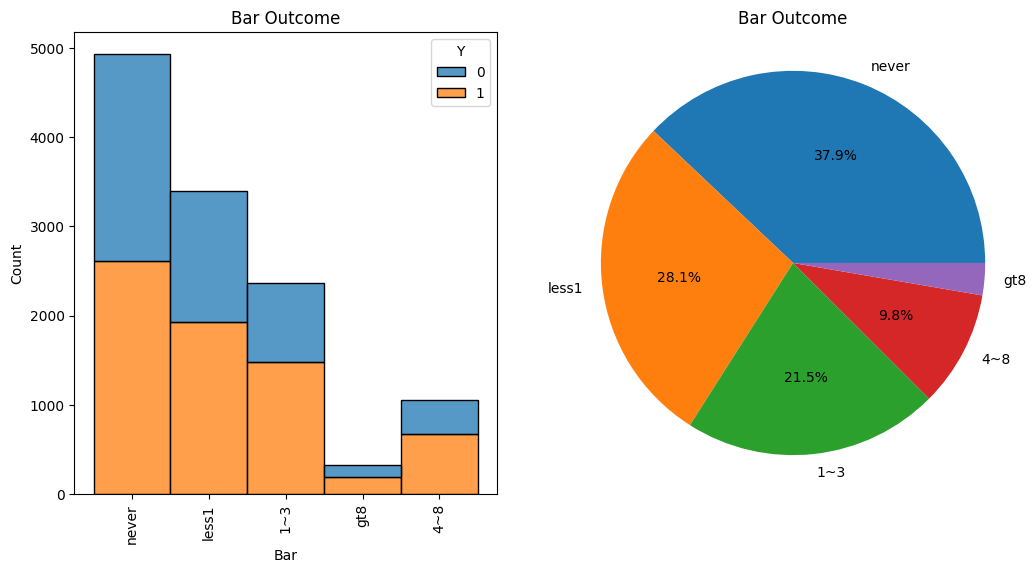

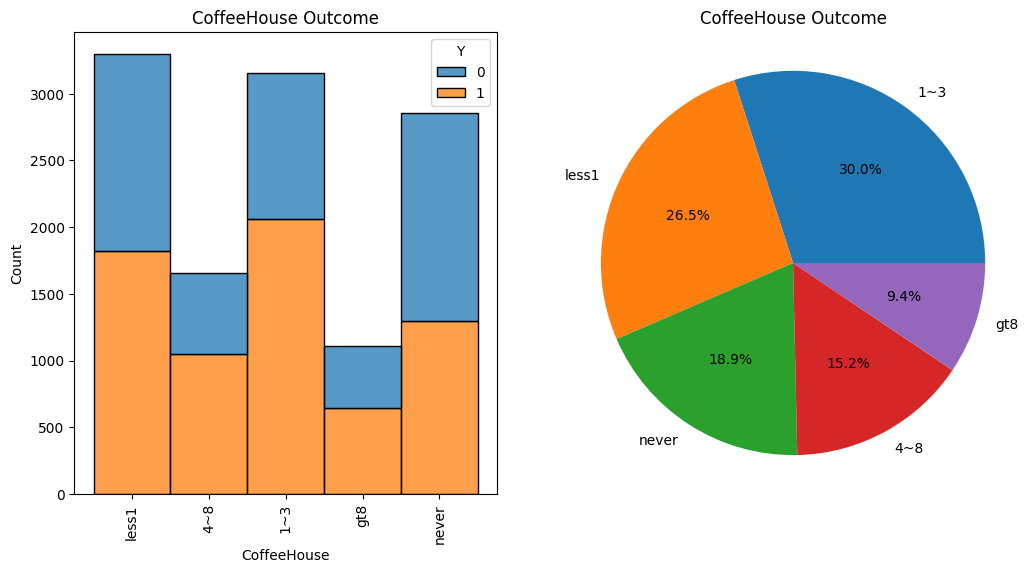

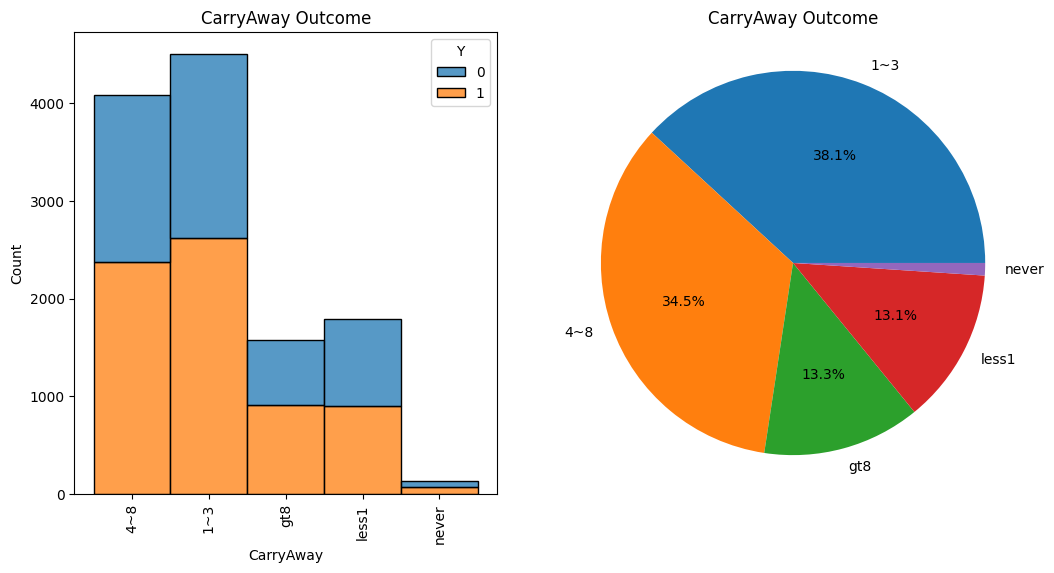

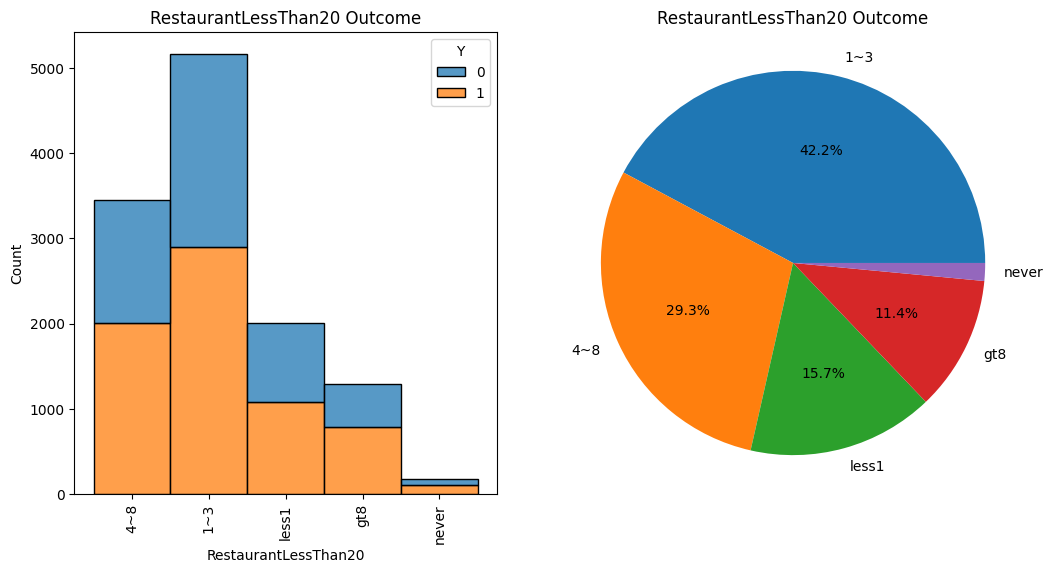

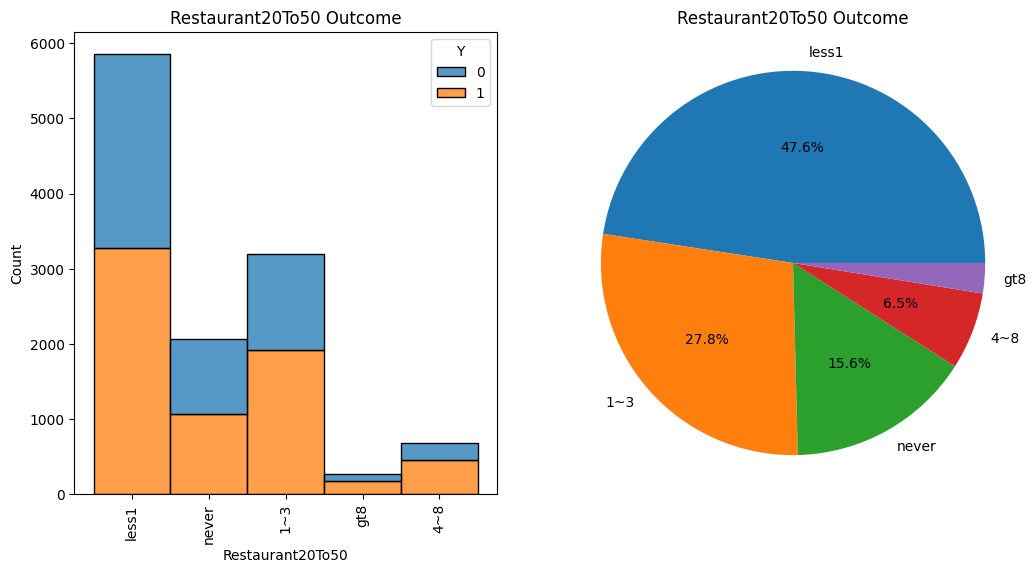

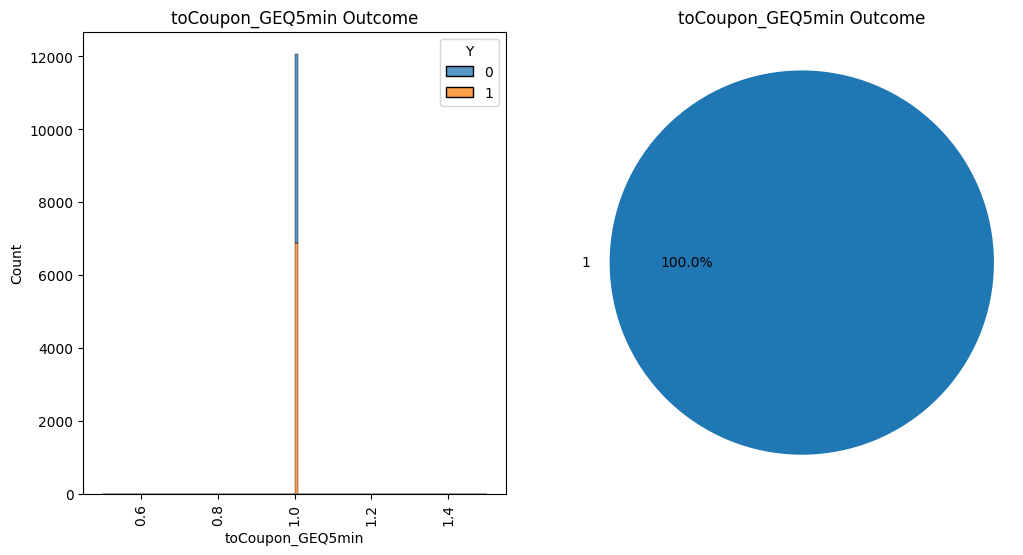

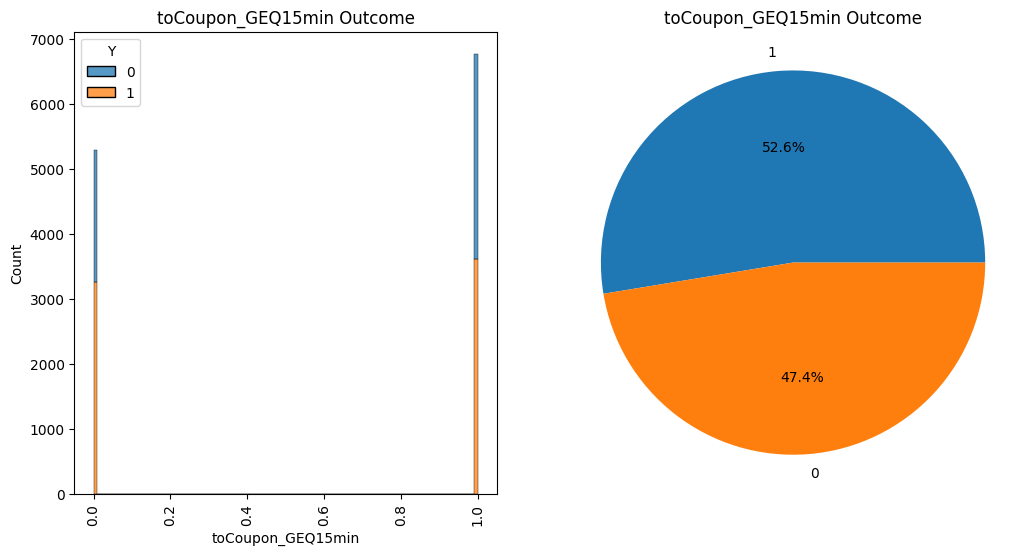

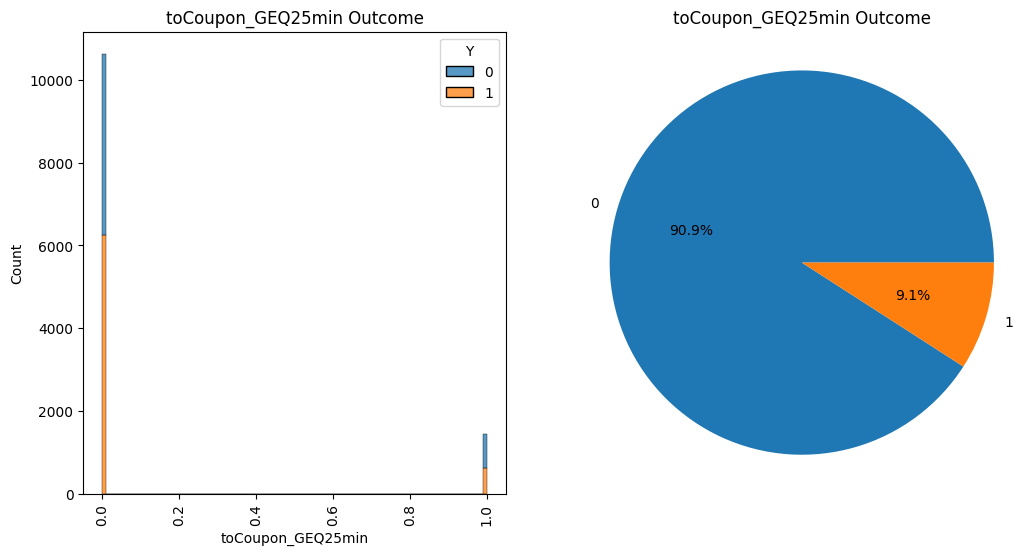

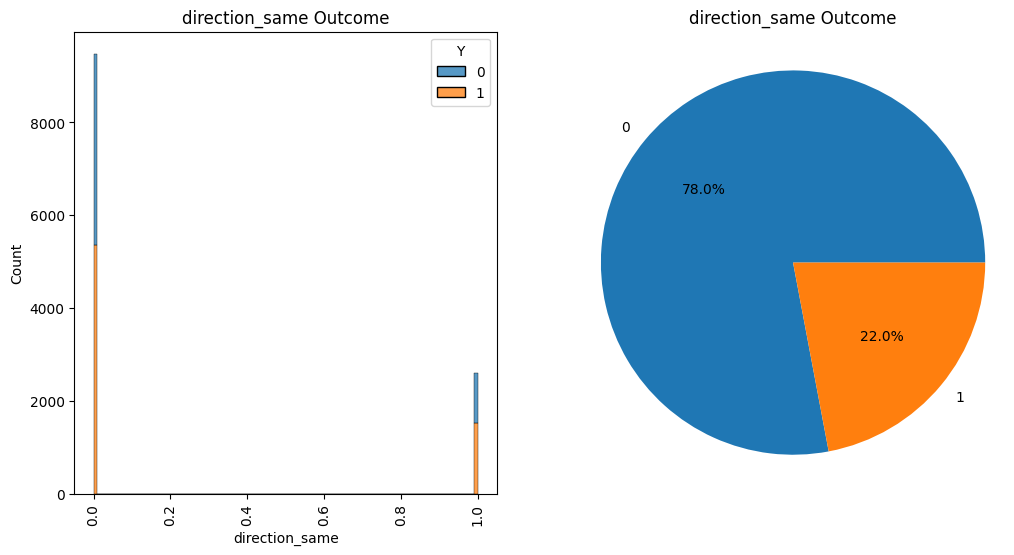

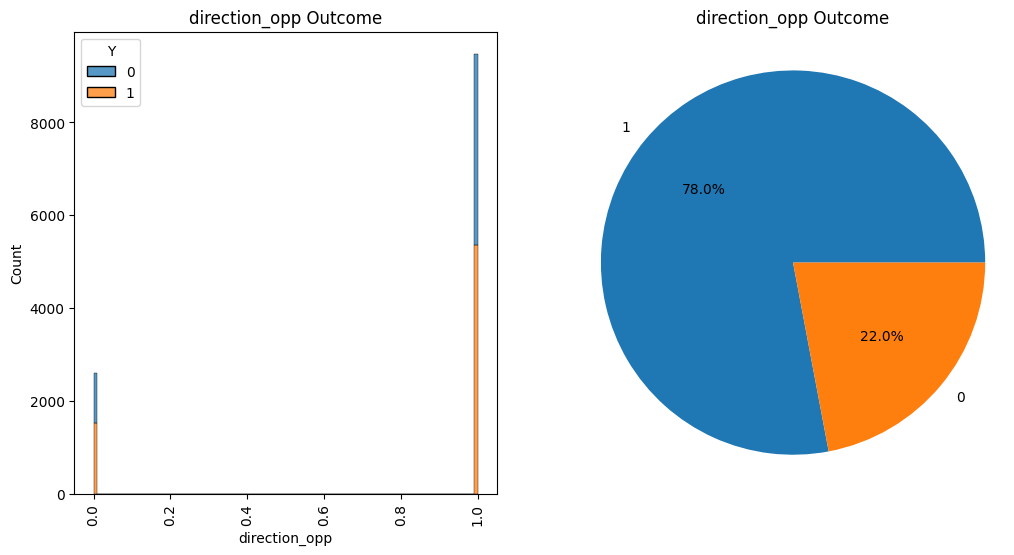

%: Coupon Acceptance: 56.93%
destination: destination
No Urgent Place    31.335375
Home               12.981207
Work               12.616938
Name: count, dtype: float64%
passanger: passanger
Alone        30.408146
Friend(s)    17.625631
Partner       5.041808
Kid(s)        3.857935
Name: count, dtype: float64%
weather: weather
Sunny    47.296962
Snowy     5.248779
Rainy     4.387780
Name: count, dtype: float64%
temperature: temperature
80    30.888319
55    16.284461
30     9.760742
Name: count, dtype: float64%
time: time
6PM     14.852223
7AM     12.616938
10AM    10.861826
2PM     10.481000
10PM     8.121533
Name: count, dtype: float64%
coupon: coupon
Coffee House             15.680106
Restaurant(<20)          15.572481
Carry out & Take away    13.924994
Bar                       6.523719
Restaurant(20-50)         5.232221
Name: count, dtype: float64%
expiration: expiration
1d    35.135359
2h    21.798162
Name: count, dtype: float64%
gender: gender
Male      28.835168
Female    28.09

In [21]:
# Independent Investigation
#
# Cleanup Data
#   Remove 'Car' column
#   dropna()
# Perform subgroup counts()
#   Value Counts for coupons accepted / non-accepted
#
df = pd.read_csv('data/coupons.csv')
df = df.drop( columns=['car'] )

df['age'] = df['age'].replace('50plus' ,'50')
df['age'] = df['age'].replace('below21','20')
df['age'] = df['age'].astype('int64')
df = df.dropna()

# Individual features % with positive outcome
outcome_field = 'Y'
for feature in df.columns:
    if feature != 'Y':
        total_counts = df[ feature ].count()
        percentage_good = df[ df['Y'] ==1 ][feature].value_counts() / total_counts * 100    
        percentage_bad  = 100 - percentage_good
        fig, axs = plt.subplots(1, 2, figsize=(12,6))
        sns.histplot(data=df, x=feature, bins= 100, hue=outcome_field, multiple='stack', ax=axs[0])
        axs[0].set_title(f'{feature} Outcome')
        axs[0].set_xlabel(feature)
        axs[0].set_ylabel('Count')
        axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

        # Plot pie chart
        axs[1].pie(percentage_good, labels=percentage_good.index, radius=0.5, autopct=lambda p: f'{p:.1f}%' if p>6.0 else '',labeldistance=1.1)
        axs[1].set_title(f'{feature} Outcome')
        axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        plt.show()

total_counts = len( df['Y'] == 1 )
occ_count = len(df[ df['Y'] == 1 ]['occupation'])
percentage = 100 * (occ_count / total_counts)

print(f'%: Coupon Acceptance: {percentage:.2f}%')

outcome_field = 'Y'
total_rcds = len( df )
for feature in df.columns:
    if feature != 'Y':
        percentage_good = df[df['Y']==1][feature].value_counts()  
        percentage_impact = 100 * ( percentage_good / total_rcds )
        print(f'{feature}: {percentage_impact}%')



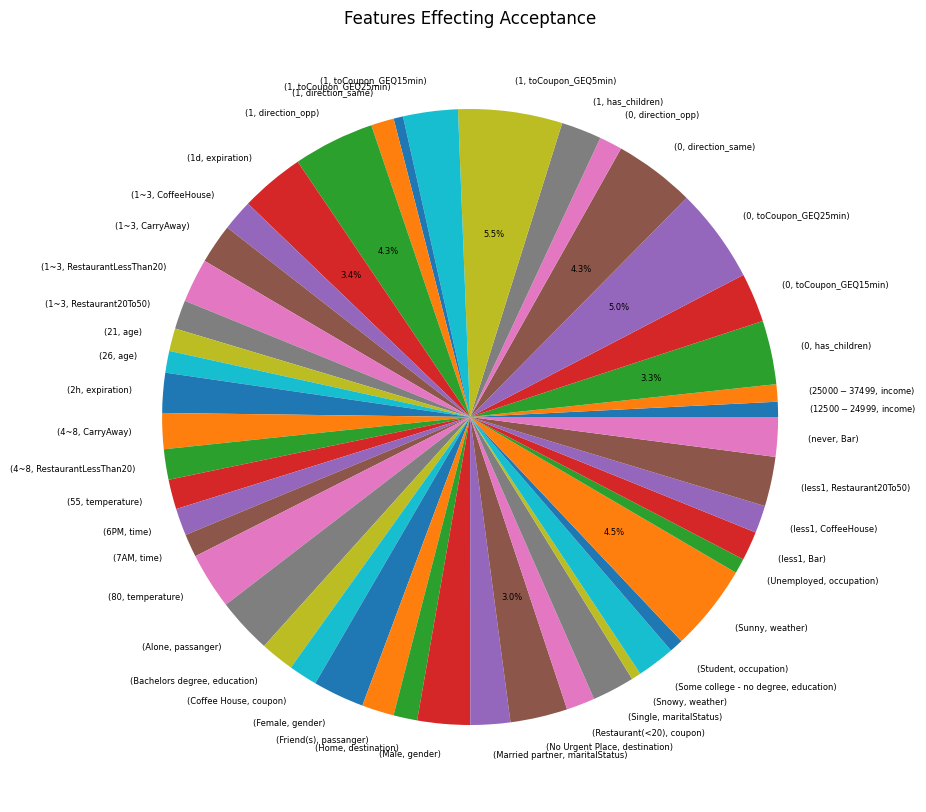

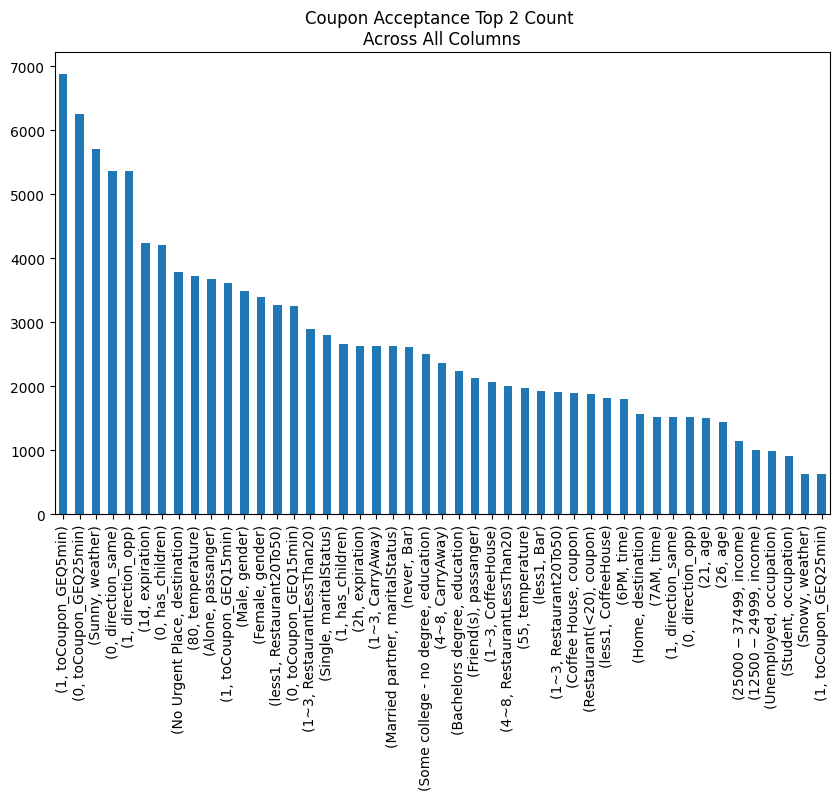

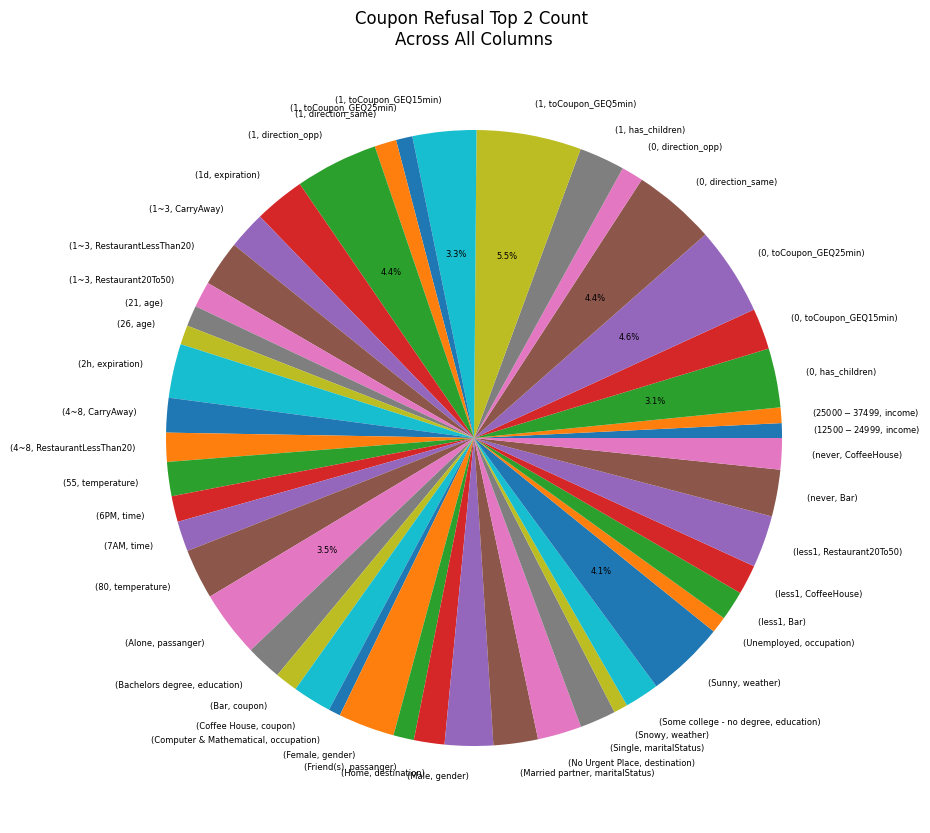

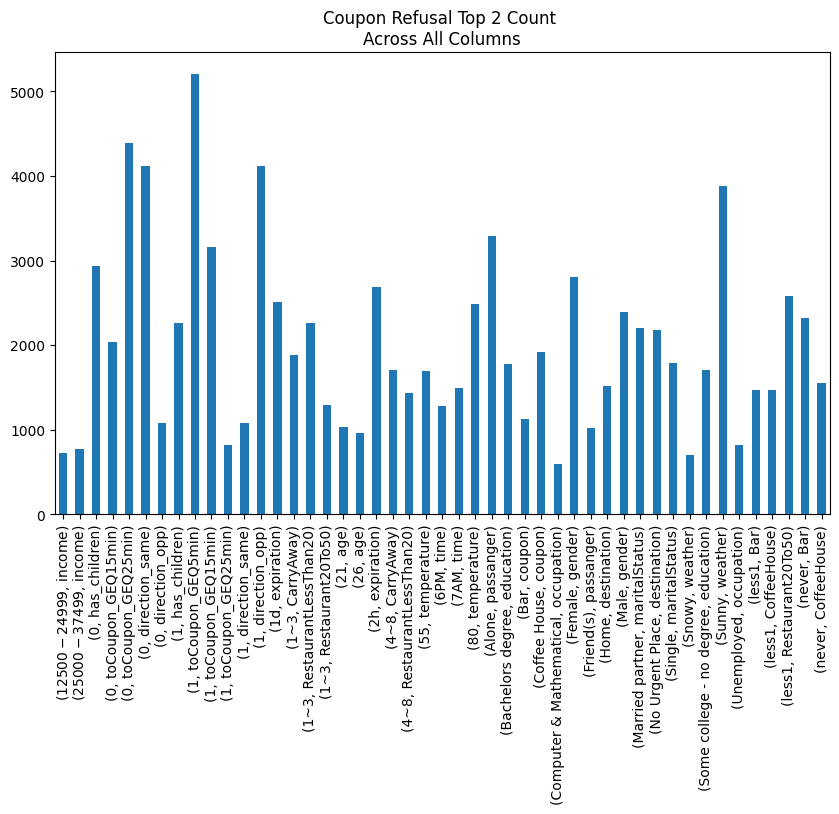

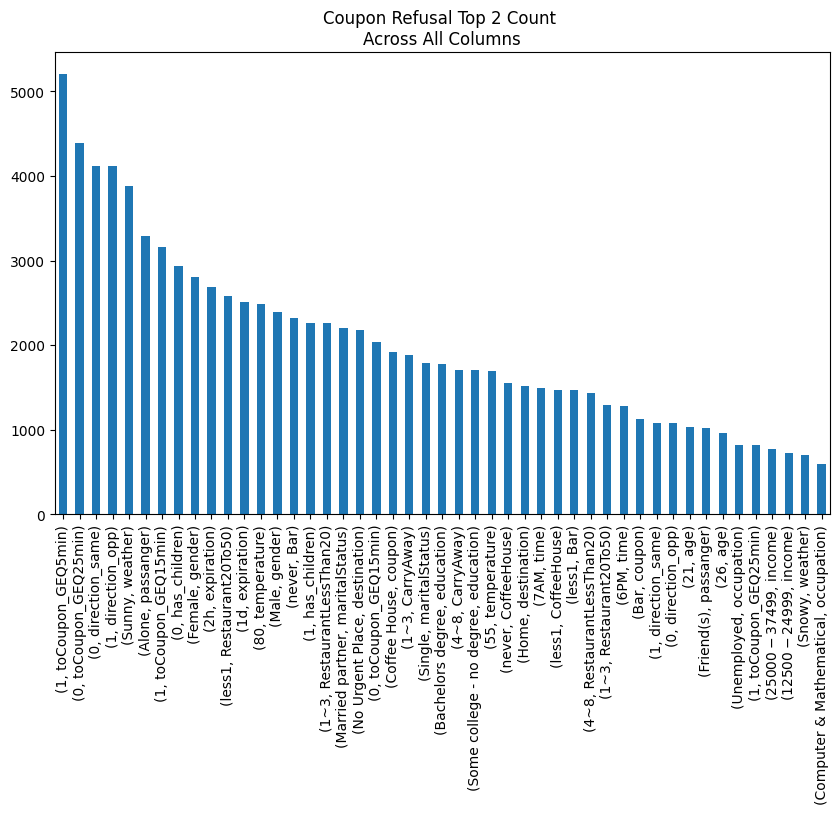

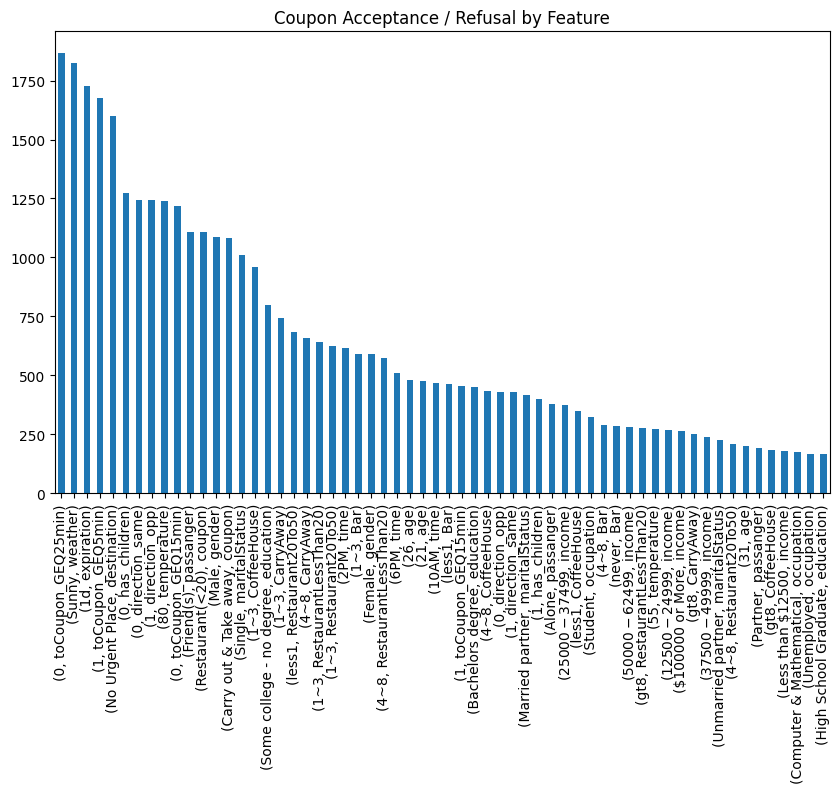

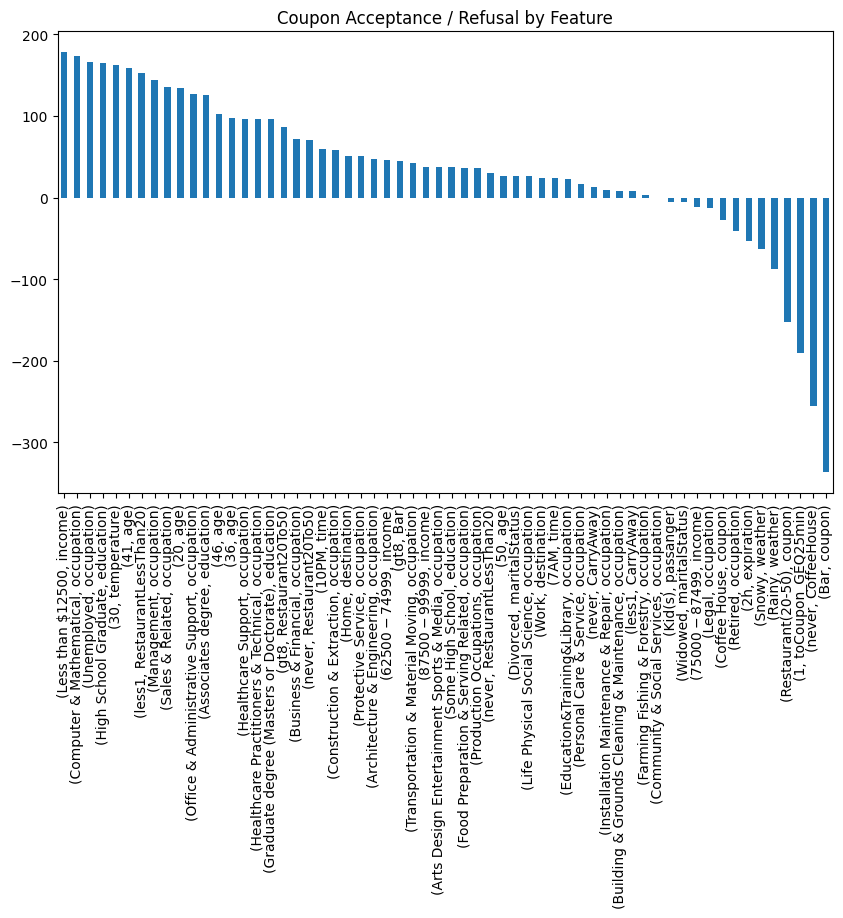

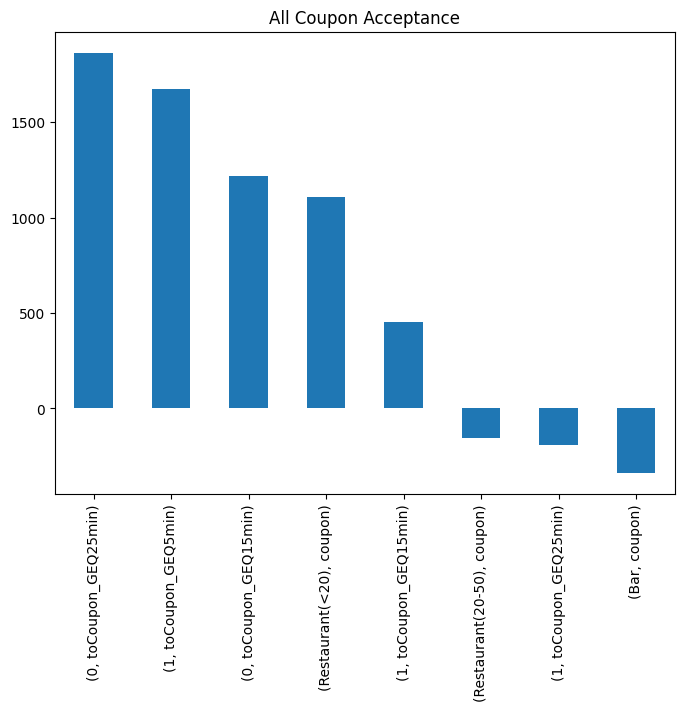

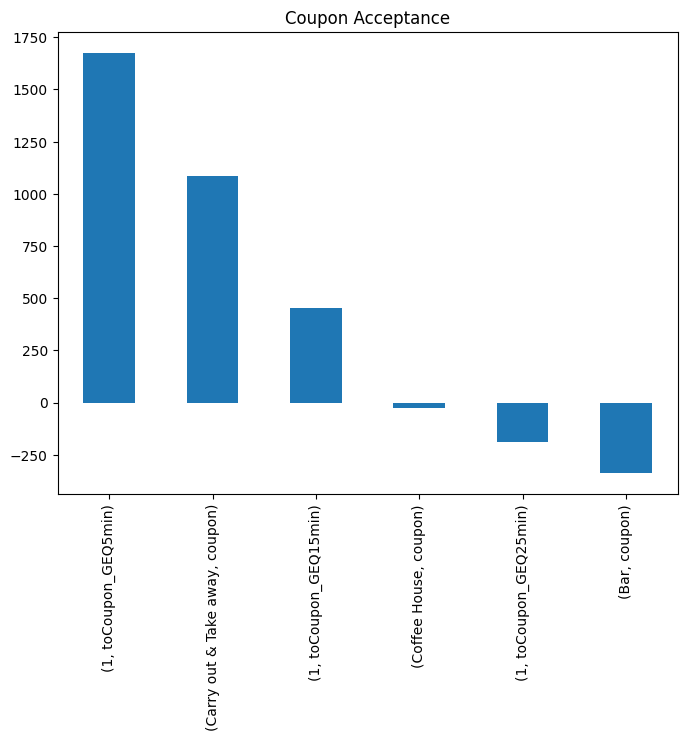

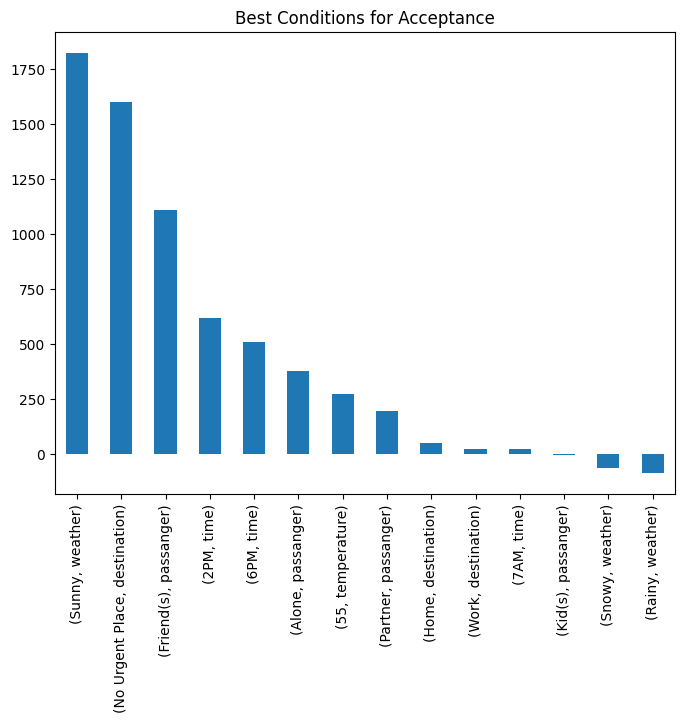

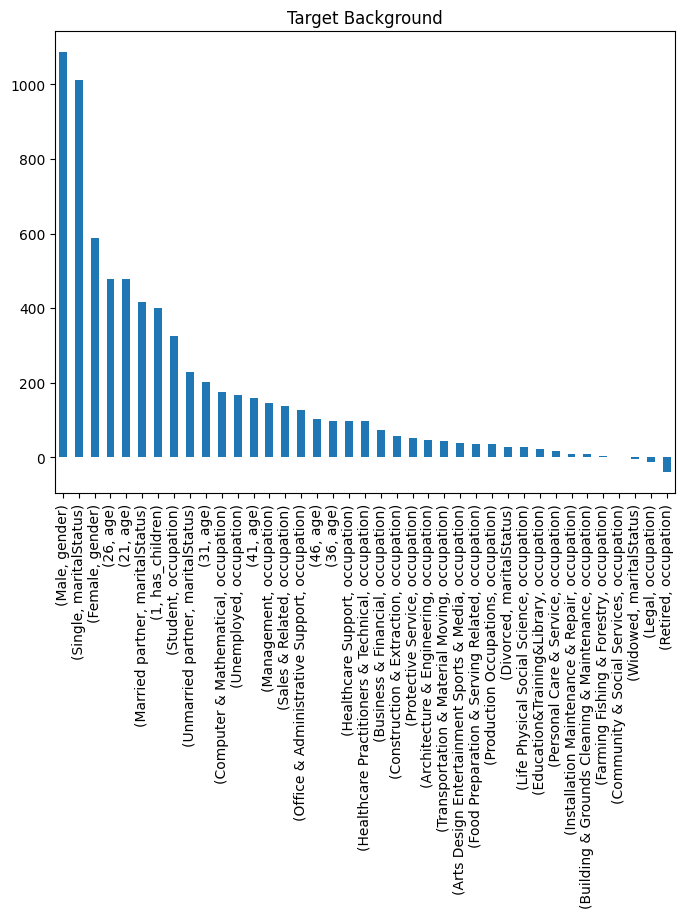

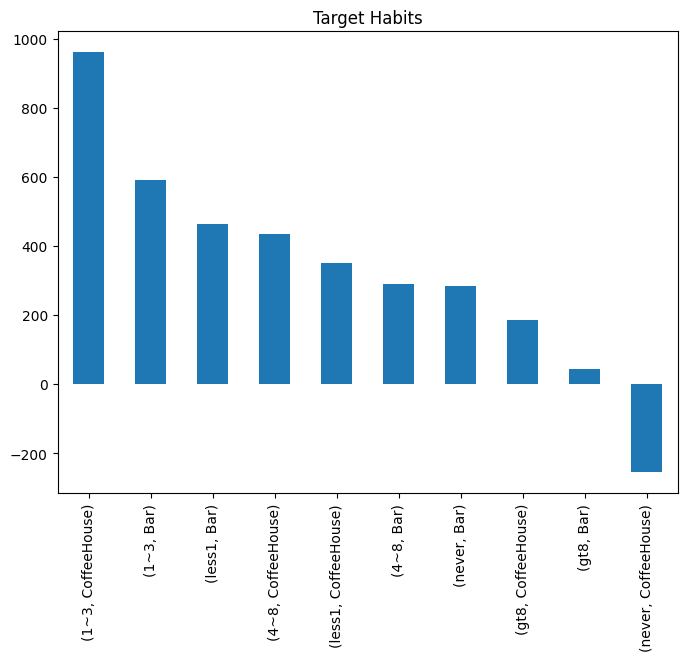

In [22]:
#
# Investigation: Which unique "features" are important to coupon acceptance
#
def explore_multi_index_features(focus_series, criteria_list, title, index0_val):
    result_series_list = []
    for keyword in criteria_list:
        # Search for the keyword in the first level of the MultiIndex
        filtered_series = focus_series[ (focus_series.index.get_level_values(1).str.contains(keyword)) &
                                   ~(focus_series.index.get_level_values(0).str.contains(index0_val) )]
        result_series_list.append( filtered_series )

    results = pd.concat( result_series_list ).sort_values(ascending=False)
    results.plot(kind='bar',figsize=(8,6))
    plt.title(title)
    plt.show()    

def plot_bar(df,title):
    df.plot(kind='bar', figsize=(10,6))
    plt.title(title)
    plt.show()
    
def plot_pie(df,title):
    plt.figure(figsize=(14,10))
    df.plot(kind='pie',autopct=lambda p: f'{p:.1f}%' if p>3.0 else '',labeldistance=1.1,fontsize=6)
    plt.title( title )
    plt.show()

df = pd.read_csv('data/coupons.csv')

#  Clean out data 
df = df.drop( columns=['car'] )

#  Clean out data, normalize data
df['age'] = df['age'].replace('50plus' ,'50')
df['age'] = df['age'].replace('below21','20')
df['age'] = df['age'].astype('int64')
df = df.dropna()

# Analyze top coupon acceptance feature criterias
# Prepare data fixing data type for operation
df_work = df[df['Y']==1].copy()
df_work = df_work.drop( columns=['Y'] )
df_work = df_work.applymap(str)
###################################################
#   Individual features % with positive outcome   #
###################################################
top2_value_counts_1 = df_work.apply(lambda x: x.value_counts().nlargest(2))
top_value_counts_1  = df_work.apply(lambda x: x.value_counts())

value_counts_1      = top2_value_counts_1.stack()   # flatten DataFrame index
value_counts_1_all  = top_value_counts_1.stack()

# show each feature effecting coupon acceptance
plot_pie( value_counts_1, 'Features Effecting Acceptance' )

# sorted view of coupon acceptance for each feature
value_counts_sorted_1 = value_counts_1.sort_values(ascending=False)
plot_bar( value_counts_sorted_1, 'Coupon Acceptance Top 2 Count \nAcross All Columns')

###################################################
#   Individual features % with negative outcome   #
###################################################
df_work = df[df['Y']==0].copy()
df_work = df_work.drop( columns=['Y'] )
df_work = df_work.applymap(str)

top2_value_counts_0 = df_work.apply(lambda x: x.value_counts().nlargest(2))
top_value_counts_0  = df_work.apply(lambda x: x.value_counts())
value_counts_0      = top2_value_counts_0.stack()
value_counts_0_all  = top_value_counts_0.stack()

# show each feature effecting coupon refusal
plot_pie( value_counts_0,'Coupon Refusal Top 2 Count \nAcross All Columns' )

plot_bar( value_counts_0, 'Coupon Refusal Top 2 Count \nAcross All Columns')

# sorted view of coupon refusal for each feature
value_counts_0_sorted = value_counts_0.sort_values(ascending=False)
plot_bar( value_counts_0_sorted, 'Coupon Refusal Top 2 Count \nAcross All Columns')


#####################################################################
#   Analysis each features coupon acceptance / refusal, normalize   #
#   Per feature, positive means coupon acceptance, negative refusal # 
#####################################################################
value_count_diff = value_counts_1_all - value_counts_0_all
value_diff = value_count_diff.sort_values(ascending=False)

# focus only on head, where features effecting positive coupon acceptance
# tail where negative coupon acceptance
# plot
focus_series = pd.concat( [value_diff.head(60) ] )
plot_bar( focus_series,"Coupon Acceptance / Refusal by Feature" )

focus_series = pd.concat( [value_diff.tail(60) ] )
plot_bar( focus_series,"Coupon Acceptance / Refusal by Feature" )

###########################################################
# Promotion Target: Background, Incoming, Weather         #
# Prior Visits                                            #
# Coupon Type                                             #
###########################################################
##########################################################
# feature exploration                                    #
##########################################################    
focus_series = value_diff

condition_criteria  = ['destination','weather','temperature','passanger','time']
background_criteria = ['maritalStatus','age','gender','has_children', 'occupation','income']
coupon_criteria     = ['coupon','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']
exp_criteria        = ['expiration']
prior_visits        = ['Bar','CoffeeHouse','CarrayAway','ResturantLessThan20','Resturant20To50']

explore_multi_index_features( focus_series, coupon_criteria,    'All Coupon Acceptance', ' ')
explore_multi_index_features( focus_series, coupon_criteria,    'Coupon Acceptance', '0')
explore_multi_index_features( focus_series, condition_criteria, 'Best Conditions for Acceptance', '0')
explore_multi_index_features( focus_series, background_criteria,'Target Background', '0')
explore_multi_index_features( focus_series, prior_visits,       'Target Habits', '0')

